In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings('ignore')

In [5]:
rowwise = pd.read_csv("./data/out/rowwise.csv")
colwise = pd.read_csv("./data/out/colwise.csv")
blockwise = pd.read_csv("./data/out/blockwise.csv")

print(rowwise.shape, colwise.shape, blockwise.shape)

typenames = ['rowwise', 'colwise', 'blockwise']

(45, 4) (45, 4) (45, 4)


In [6]:
def add_metrics(data):
    def count_speed_up(data: pd.DataFrame):
        new_data = pd.DataFrame()
        for n_rows in data['n_rows'].unique():
            local = data.query('n_rows == @n_rows')
            single_time = local[local['n_processes'] == 1]['time'].iloc[0]
            sup = []
            local['speed_up'] = single_time / local['time']
    
            new_data = pd.concat([new_data, local], axis=0)
    
        new_data = new_data.sort_values(by=['n_processes', 'n_rows'])    
        return new_data
    
    def count_efficiency(data: pd.DataFrame):
        new_data = data.copy()
        new_data['efficiency'] = new_data['speed_up'] / new_data['n_processes']
        
        return new_data  

    data = count_speed_up(data)
    data = count_efficiency(data)

    return data

In [7]:
rowwise = add_metrics(rowwise)
colwise = add_metrics(colwise)
blockwise = add_metrics(blockwise)

print(rowwise.shape, colwise.shape, blockwise.shape)

datalist = [rowwise, colwise, blockwise]

(45, 6) (45, 6) (45, 6)


In [8]:
blockwise

n_rows  n_cols  n_processes      time  speed_up  efficiency
0      600     600            1  0.001020  1.000000    1.000000
1     1800    1800            1  0.009474  1.000000    1.000000
2     3000    3000            1  0.026977  1.000000    1.000000
3     4200    4200            1  0.051229  1.000000    1.000000
4     5400    5400            1  0.085472  1.000000    1.000000
5     6600    6600            1  0.127010  1.000000    1.000000
6     7800    7800            1  0.176953  1.000000    1.000000
7     9000    9000            1  0.235573  1.000000    1.000000
8    10200   10200            1  0.304453  1.000000    1.000000
9      600     600            2  0.000802  1.271820    0.635910
10    1800    1800            2  0.009373  1.010776    0.505388
11    3000    3000            2  0.023870  1.130163    0.565082
12    4200    4200            2  0.043574  1.175678    0.587839
13    5400    5400            2  0.070970  1.204340    0.602170
14    6600    6600            2  0.105858  1.199815    0.599907
15    7800    7800            2  0.148492  1.191667    0.595833
16    9000    9000            2  0.205125  1.148436    0.574218
17   10200   10200            2  0.255263  1.192703    0.596352
18     600     600            6  0.000594  1.717172    0.286195
19    1800    1800            6  0.007696  1.231029    0.205172
20    3000    3000            6  0.021706  1.242836    0.207139
21    4200    4200            6  0.039224  1.306063    0.217677
22    5400    5400            6  0.064249  1.330324    0.221721
23    6600    6600            6  0.085648  1.482930    0.247155
24    7800    7800            6  0.120469  1.468868    0.244811
25    9000    9000            6  0.165826  1.420604    0.236767
26   10200   10200            6  0.203157  1.498609    0.249768
27     600     600           12  0.005671  0.179862    0.014989
28    1800    1800           12  0.010954  0.864890    0.072074
29    3000    3000           12  0.019608  1.375816    0.114651
30    4200    4200           12  0.039319  1.302907    0.108576
31    5400    5400           12  0.064445  1.326278    0.110523
32    6600    6600           12  0.096069  1.322071    0.110173
33    7800    7800           12  0.137379  1.288064    0.107339
34    9000    9000           12  0.158730  1.484111    0.123676
35   10200   10200           12  0.201654  1.509779    0.125815
36     600     600           24  0.383147  0.002662    0.000111
37    1800    1800           24  0.388405  0.024392    0.001016
38    3000    3000           24  0.381203  0.070768    0.002949
39    4200    4200           24  0.610007  0.083981    0.003499
40    5400    5400           24  0.738812  0.115688    0.004820
41    6600    6600           24  1.047925  0.121201    0.005050
42    7800    7800           24  1.442315  0.122687    0.005112
43    9000    9000           24  1.960609  0.120153    0.005006
44   10200   10200           24  2.265863  0.134365    0.005599

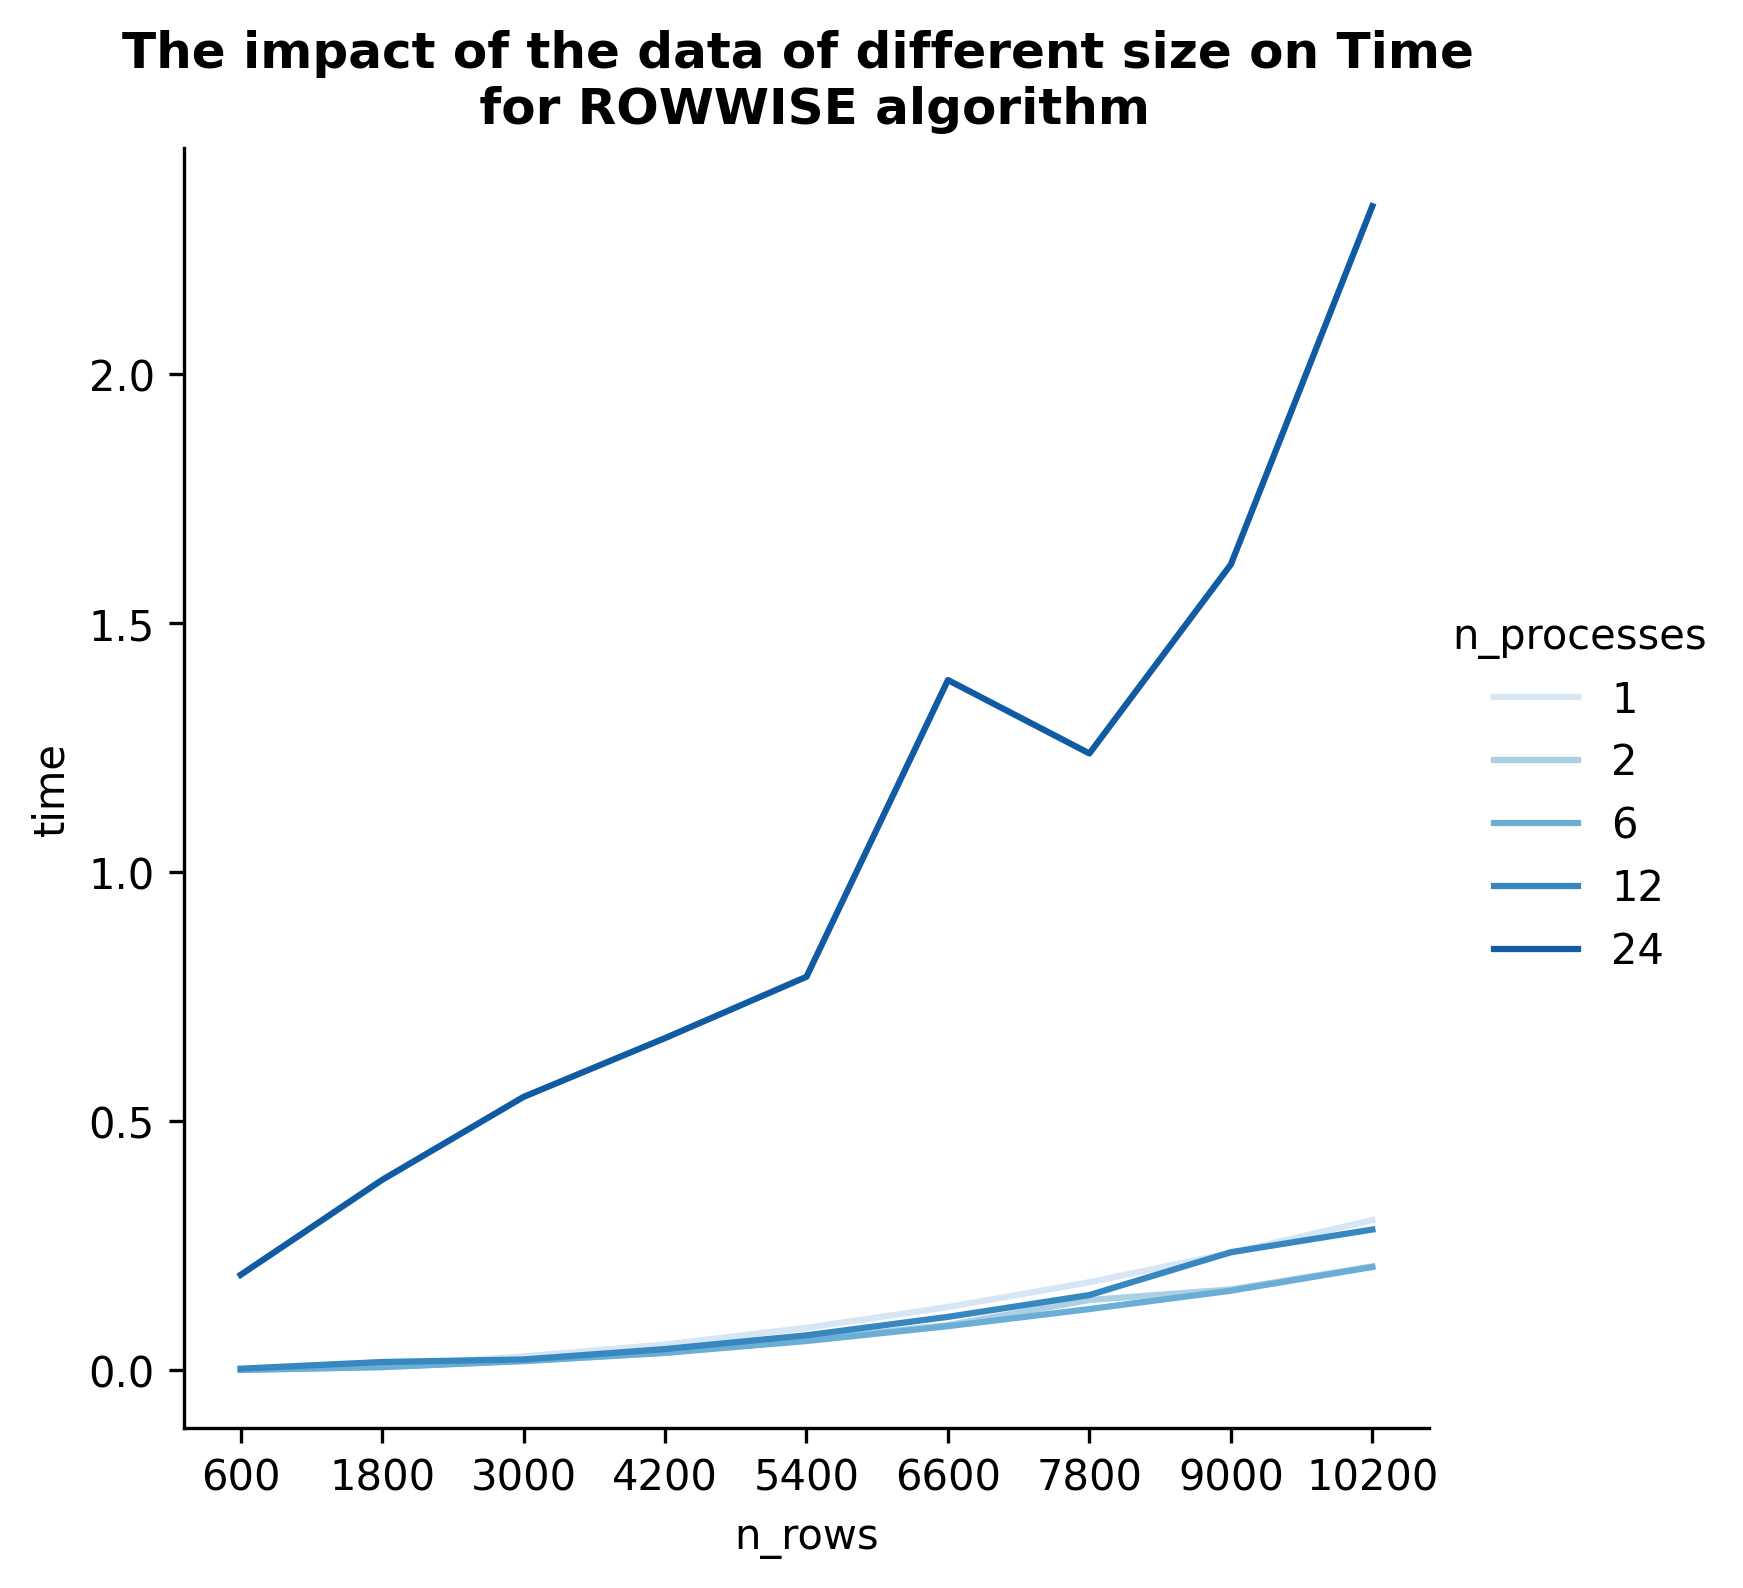

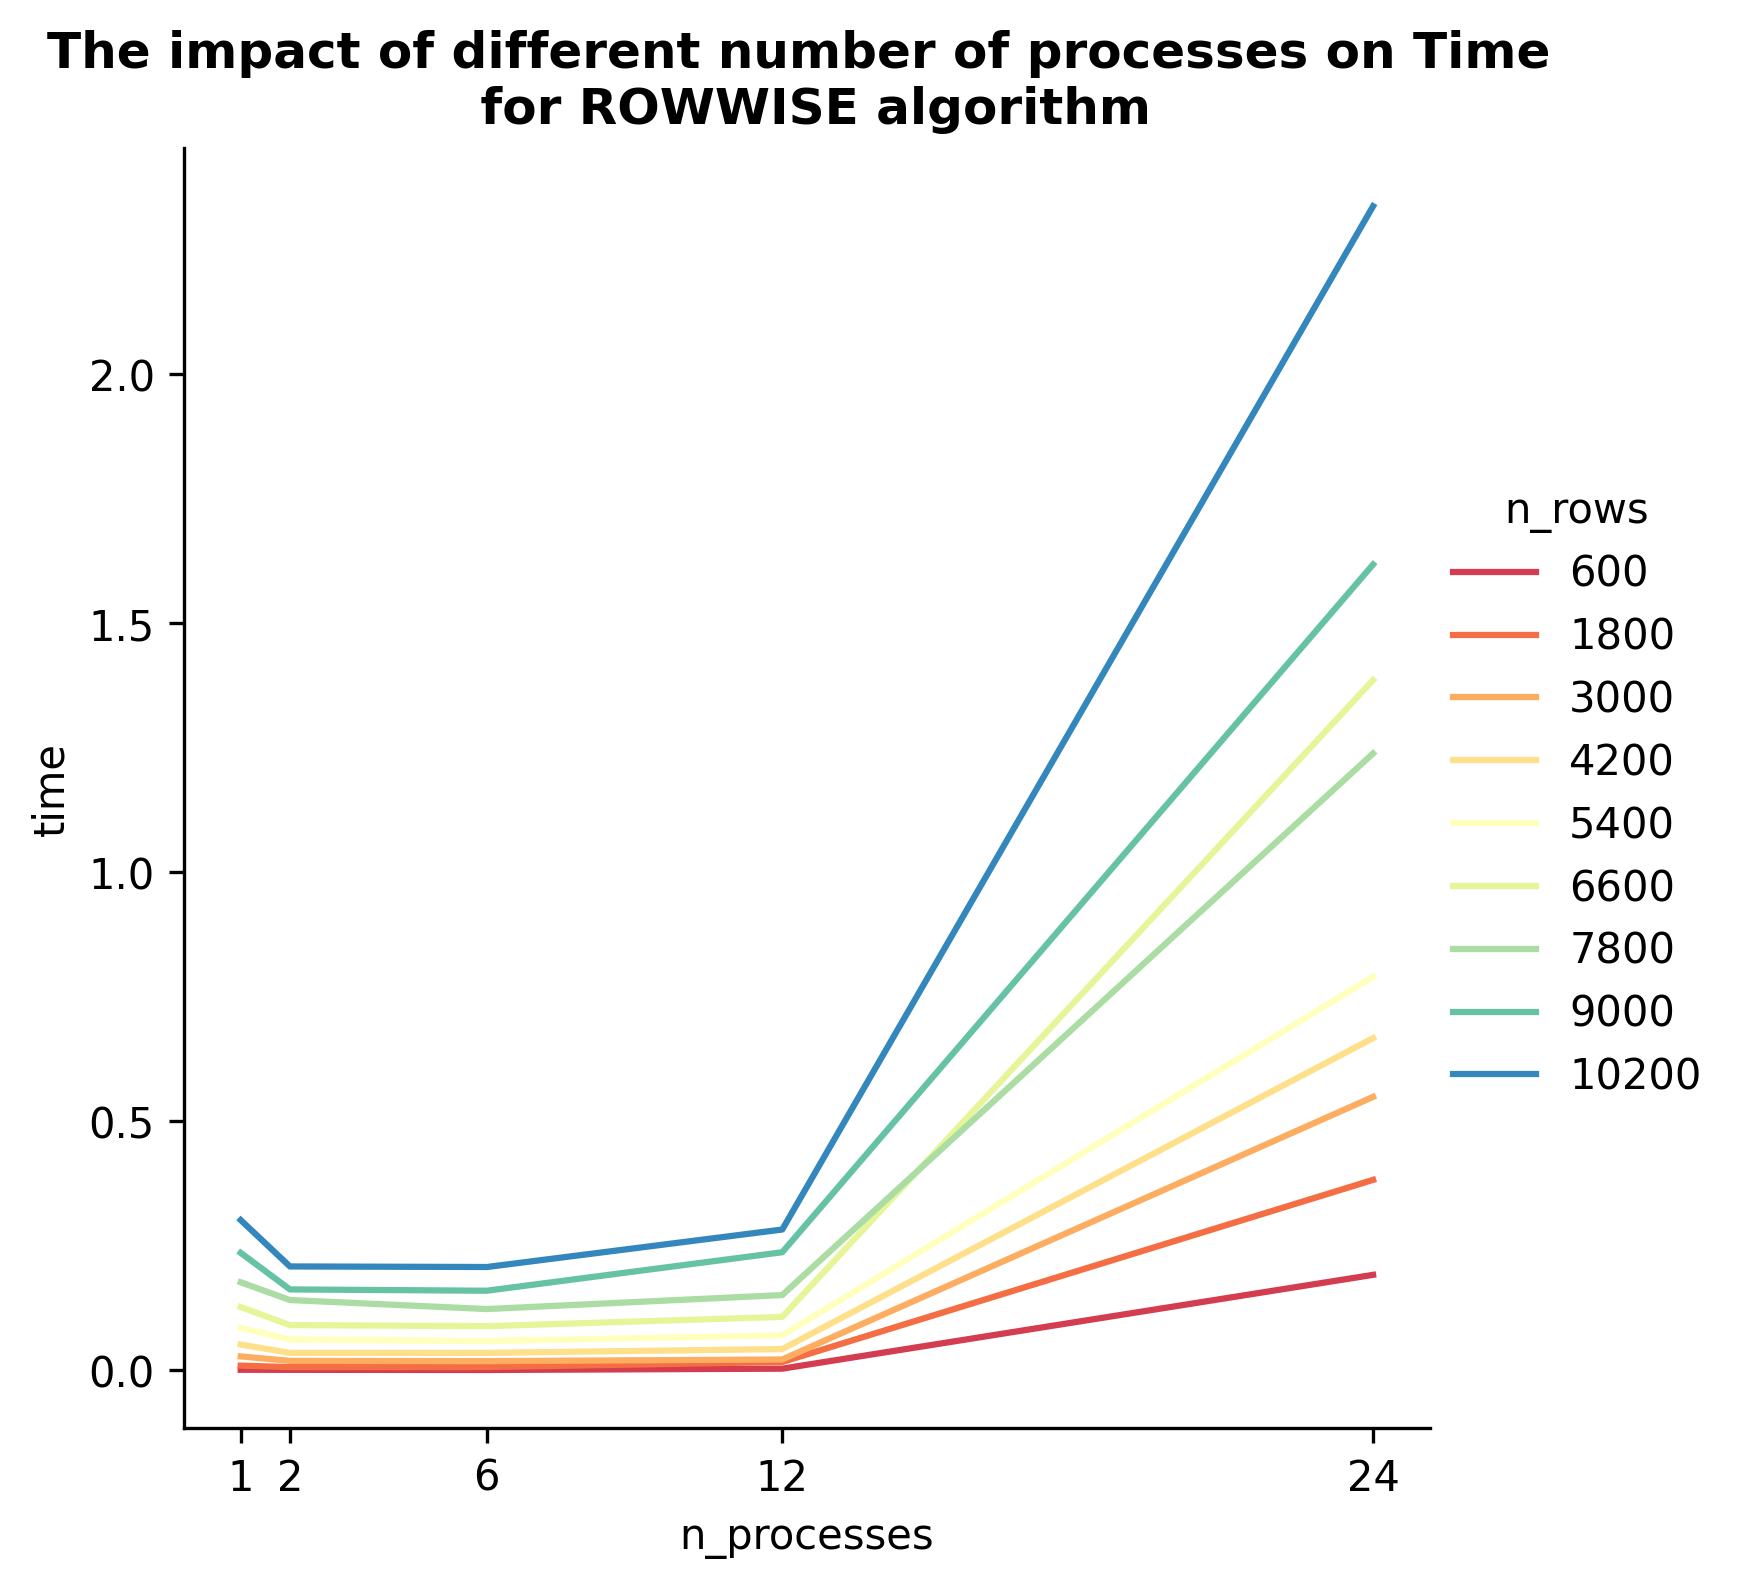

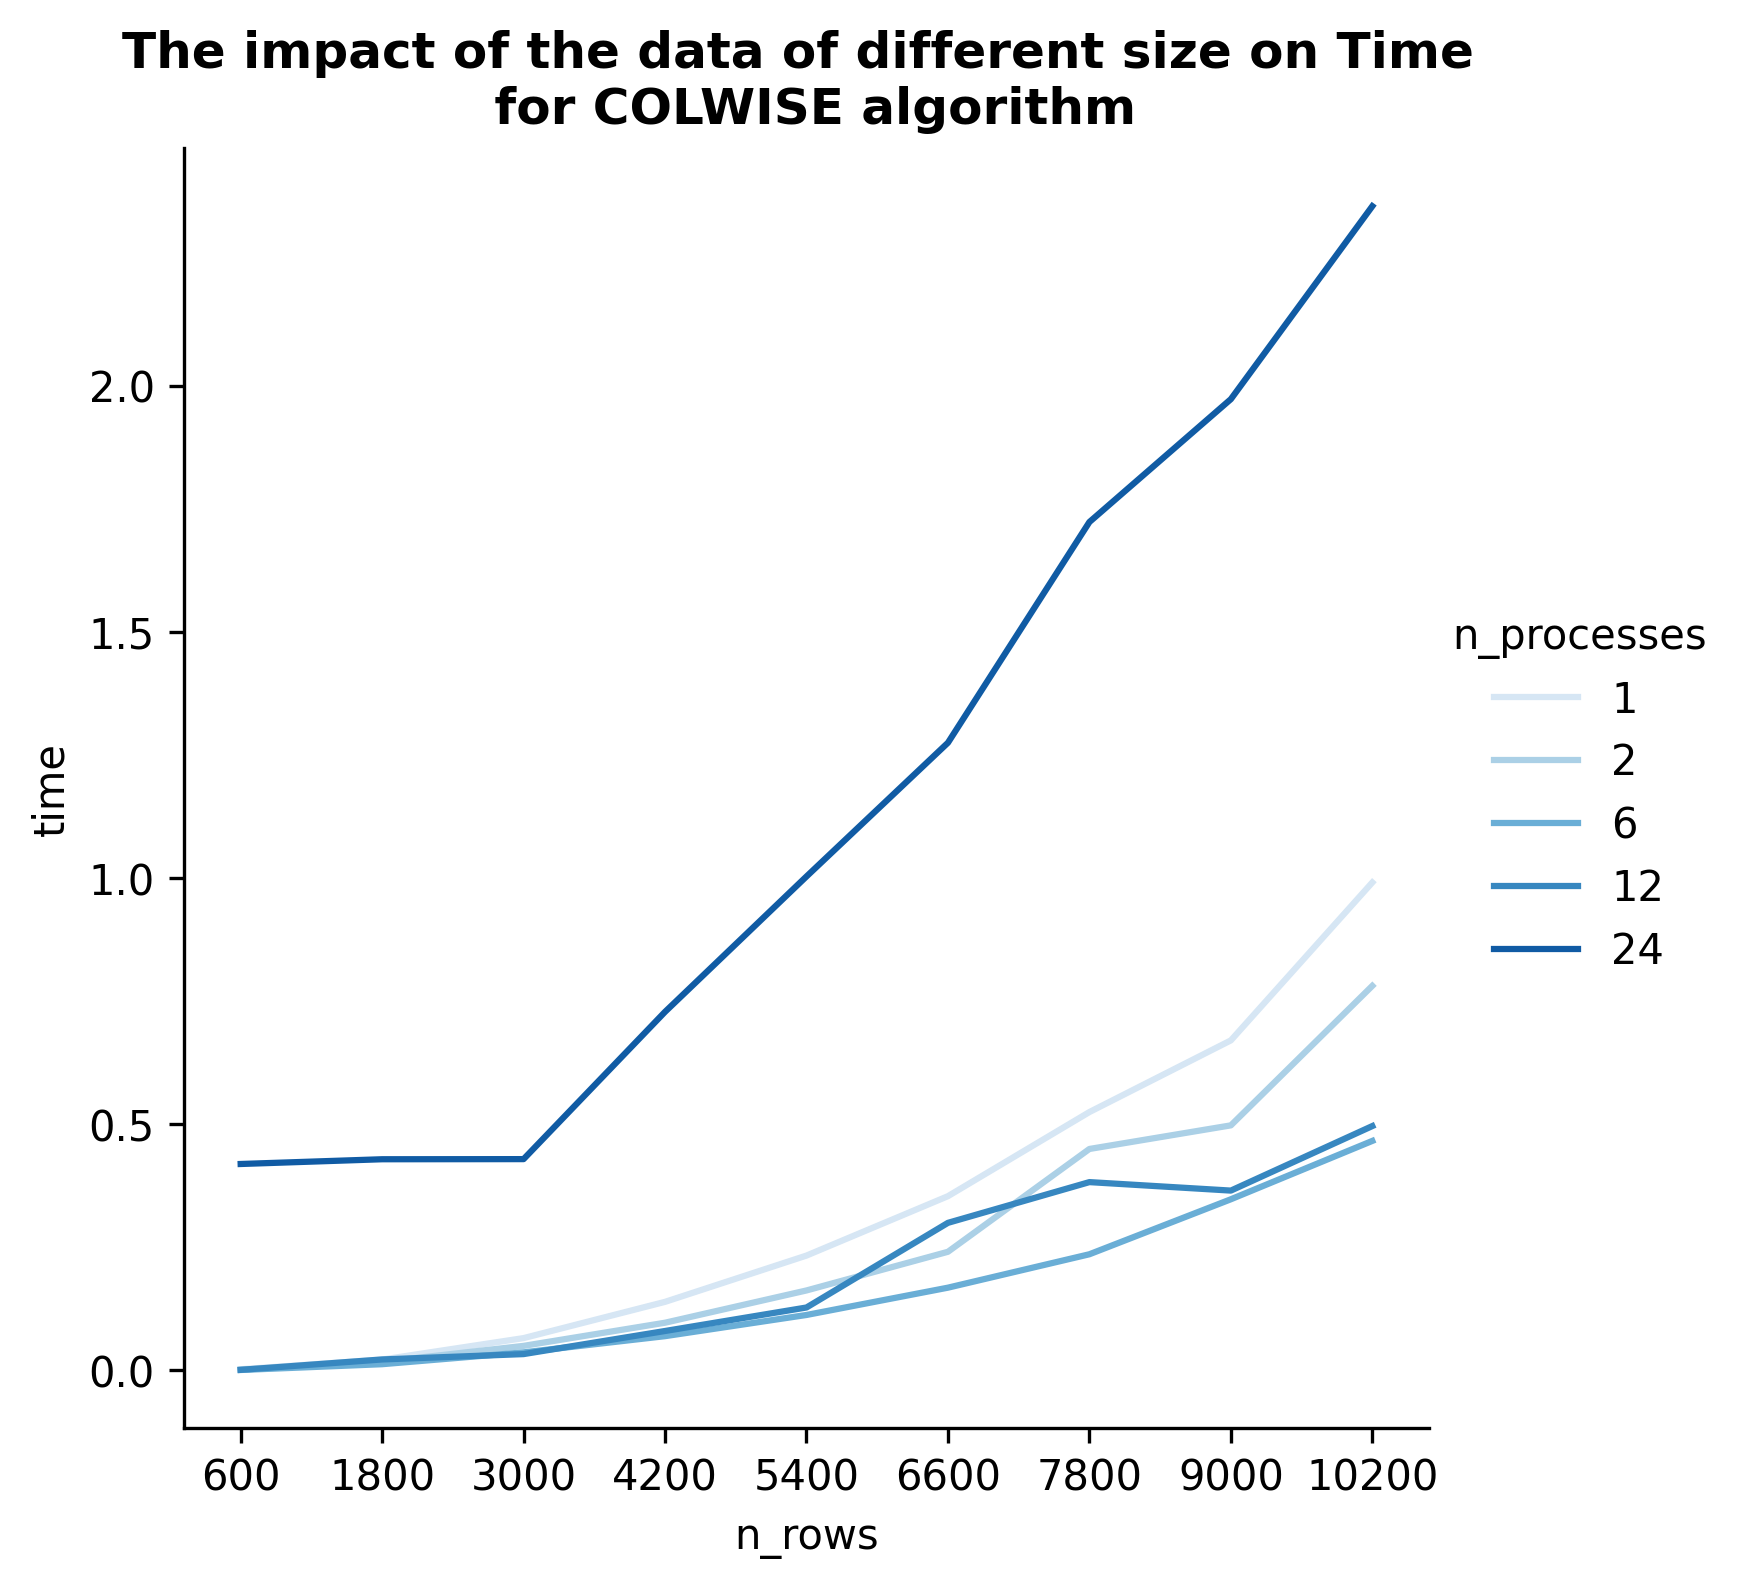

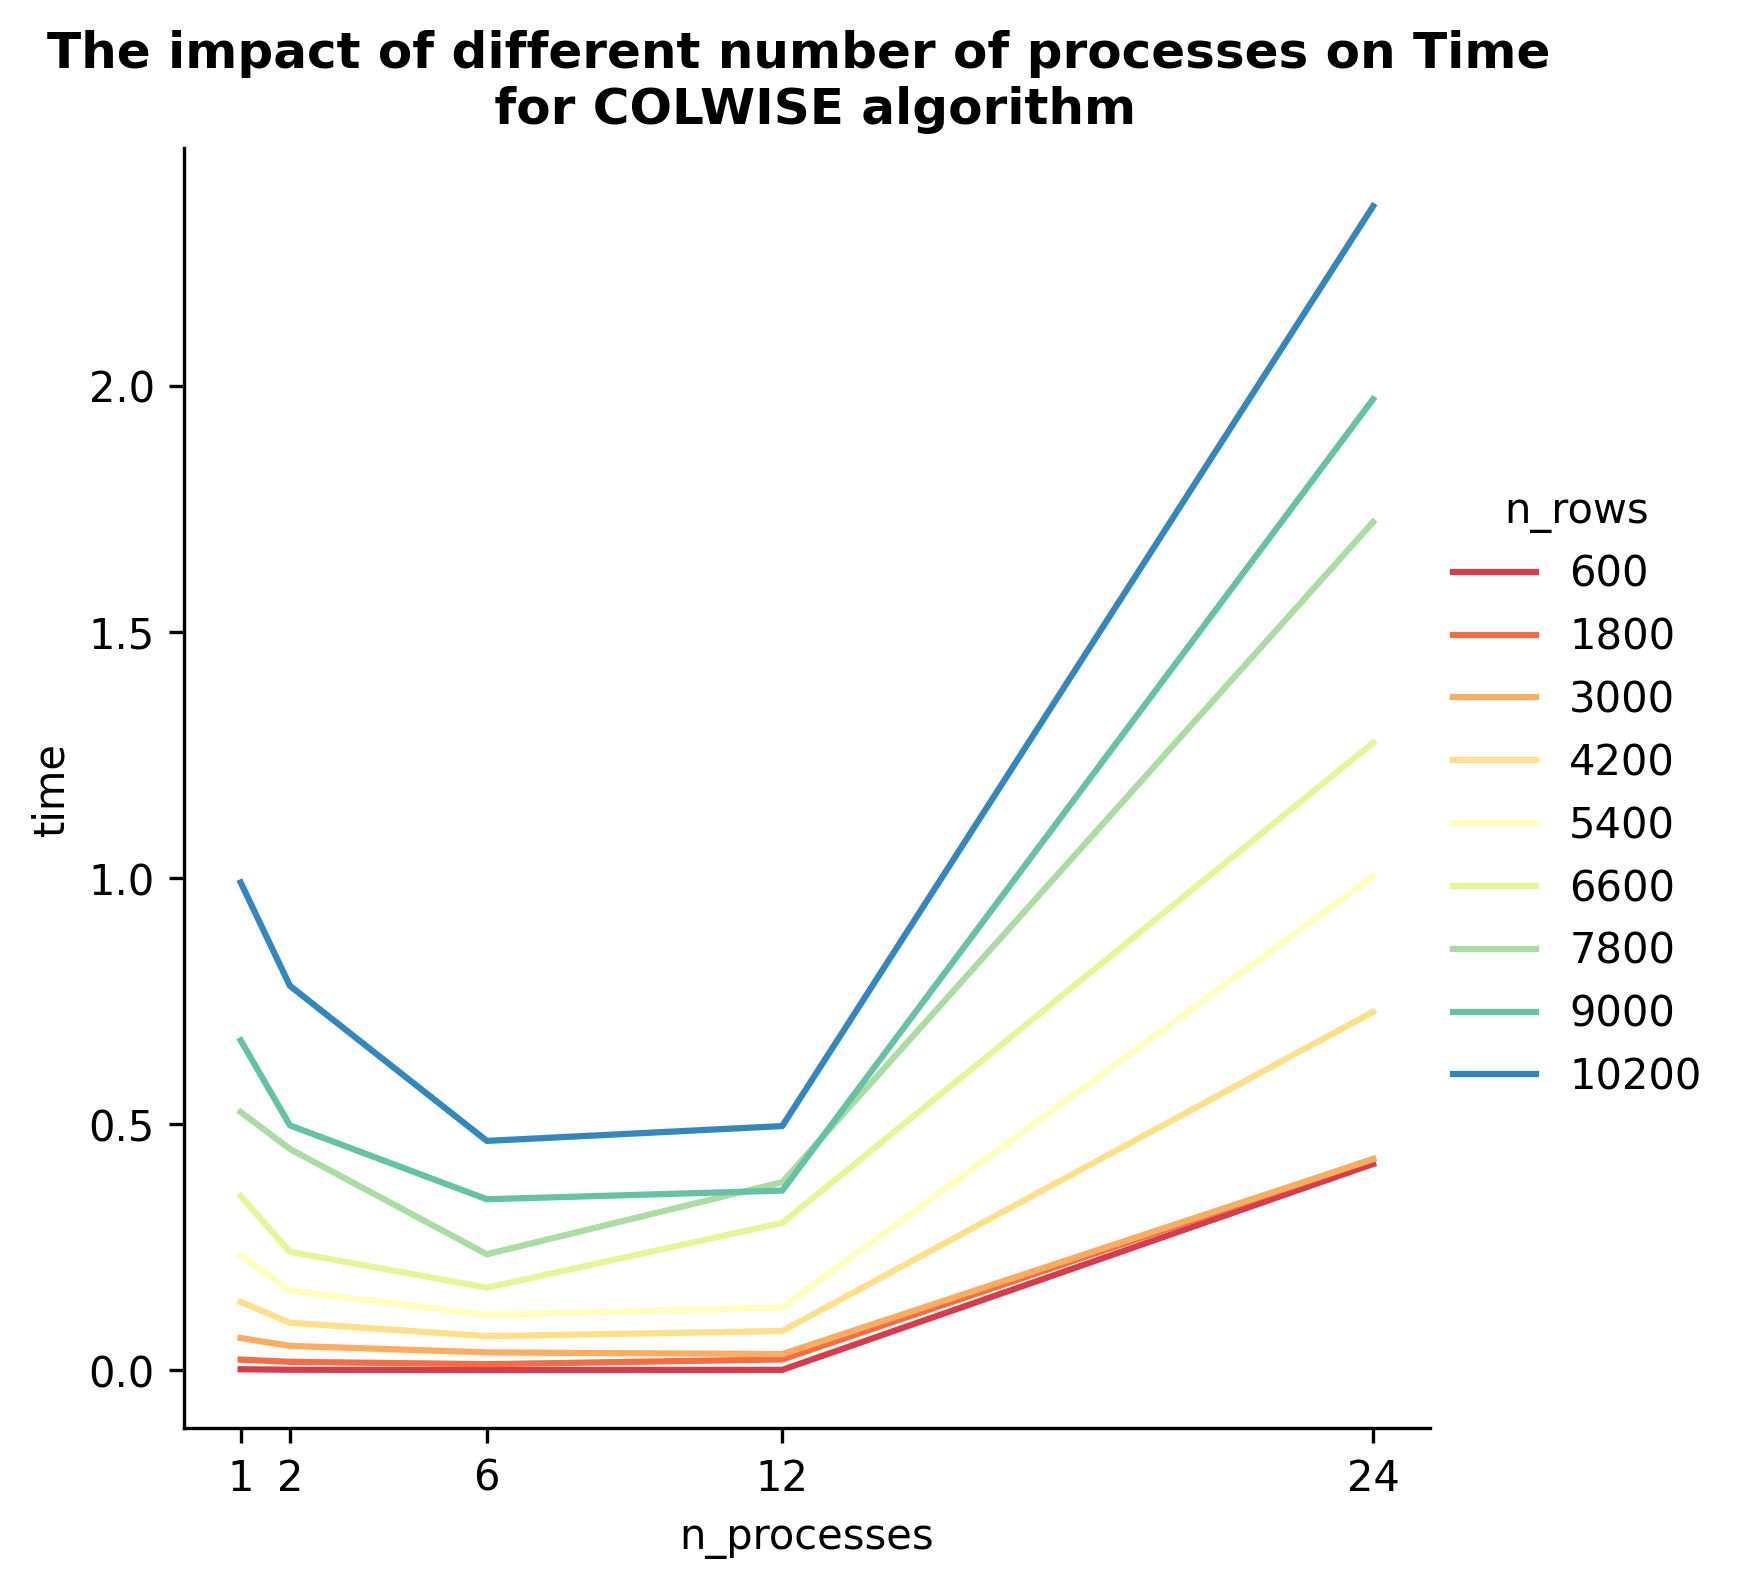

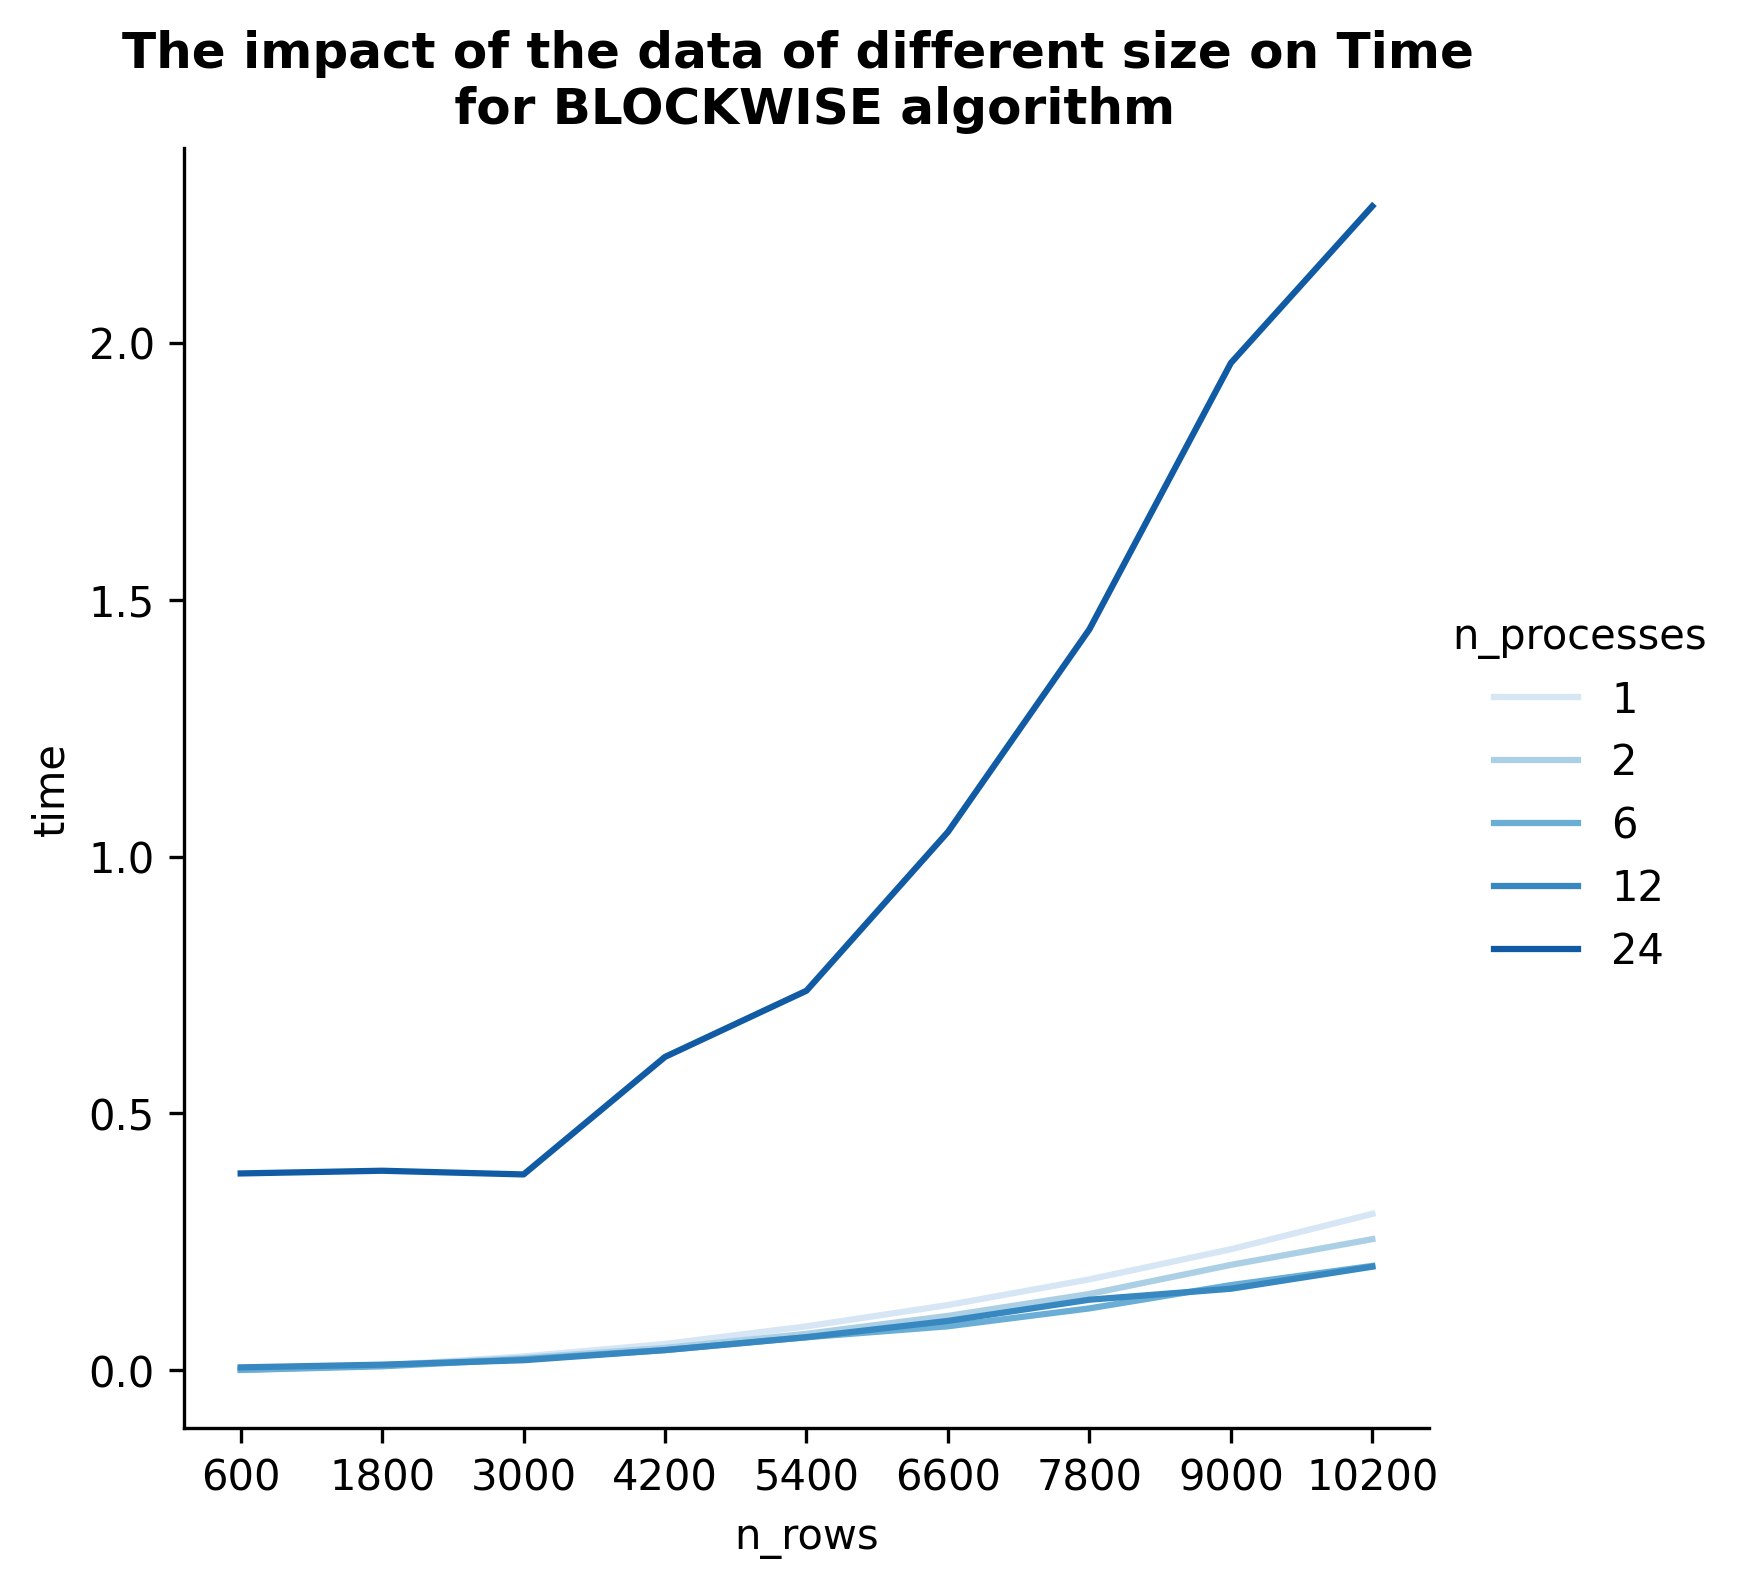

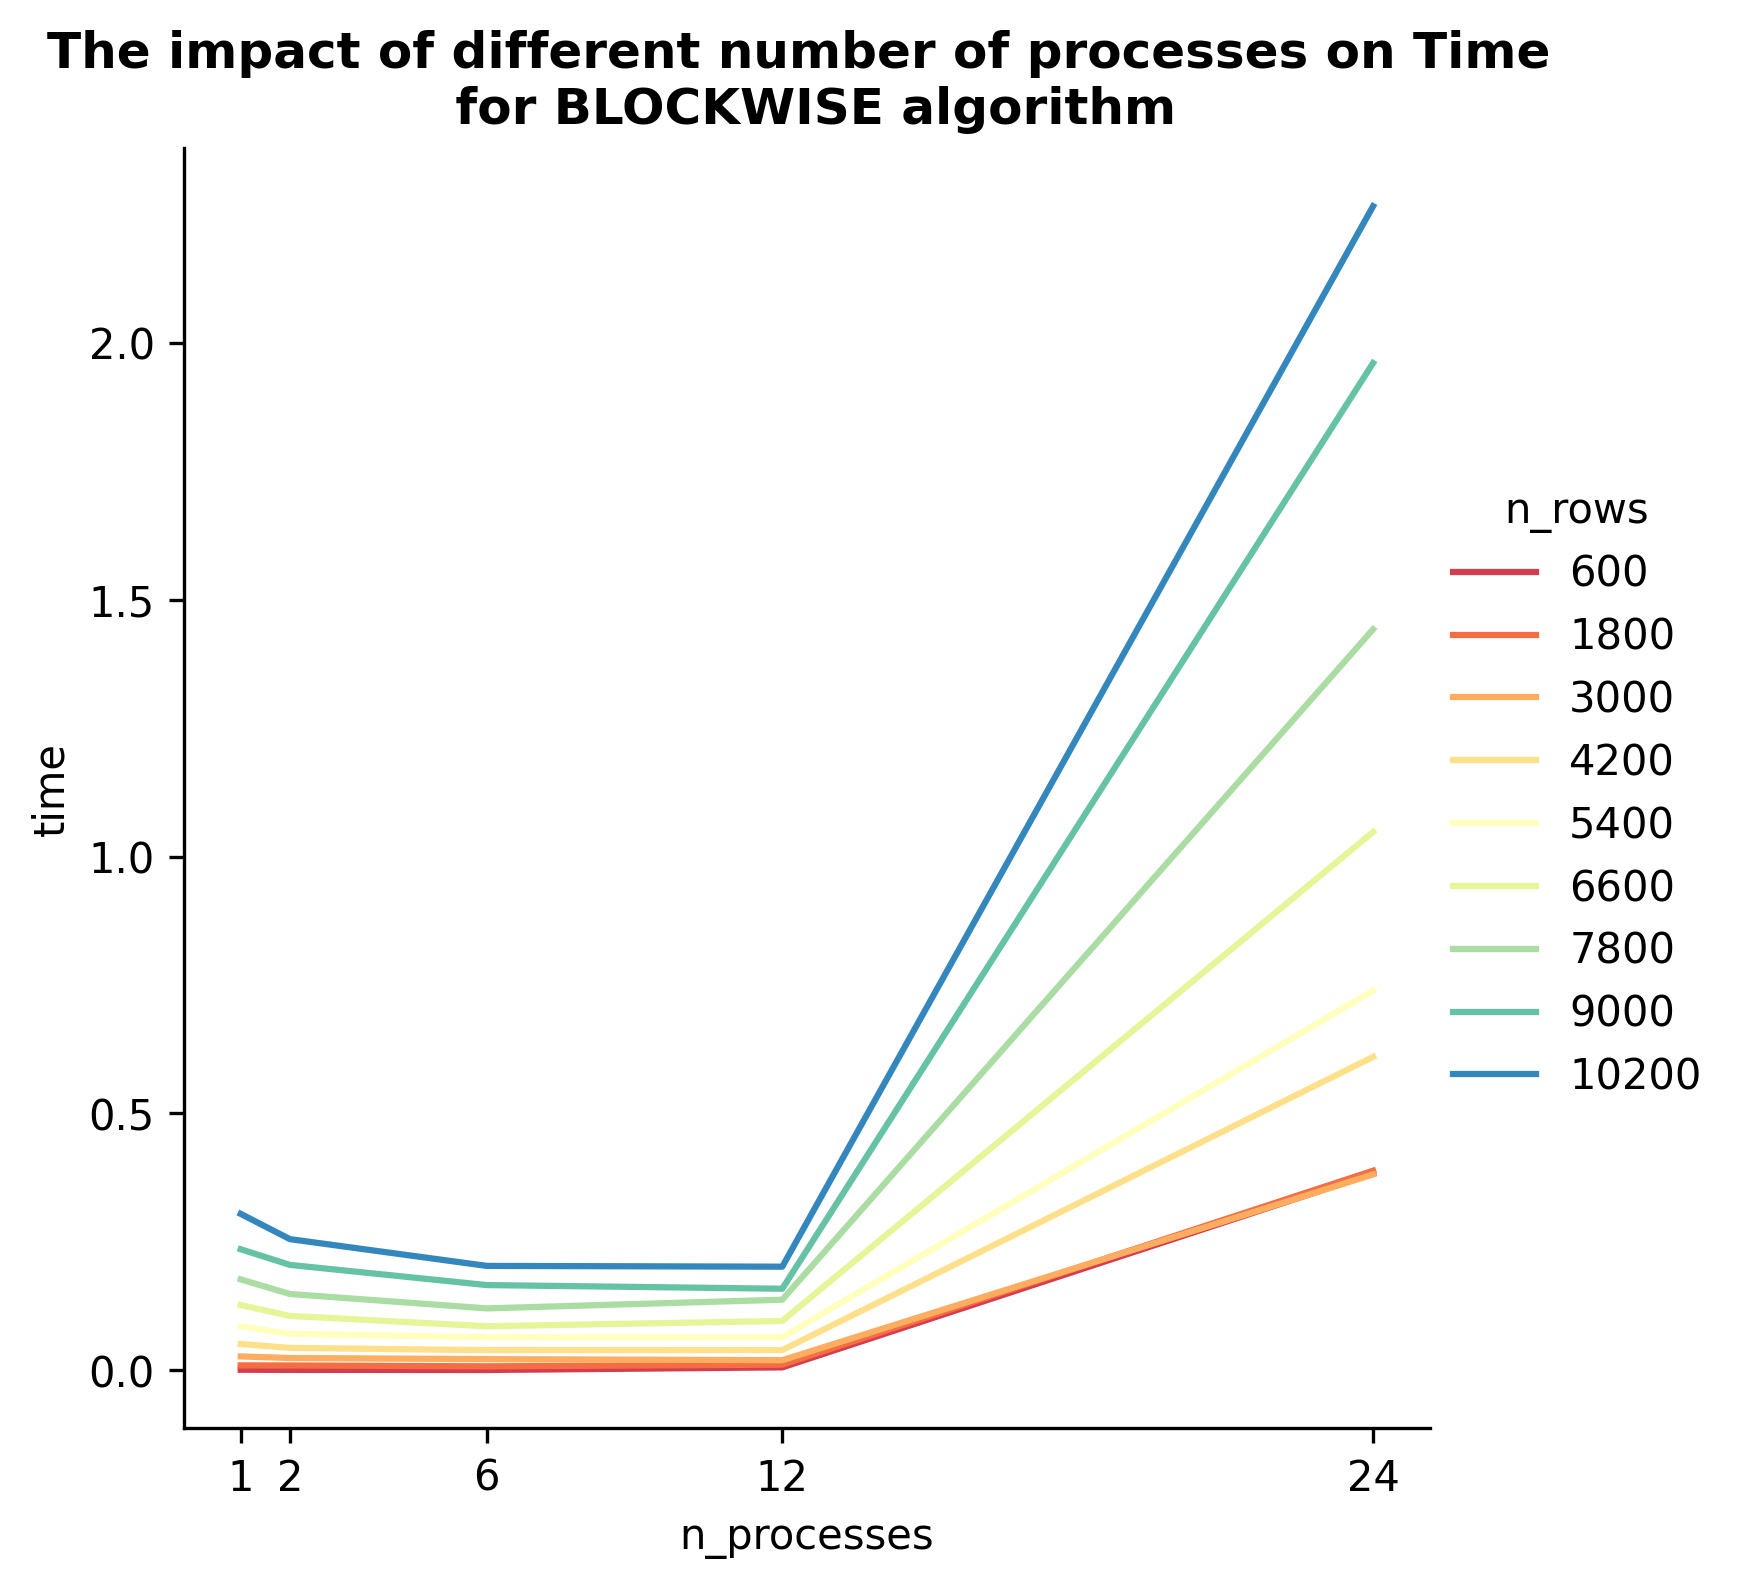

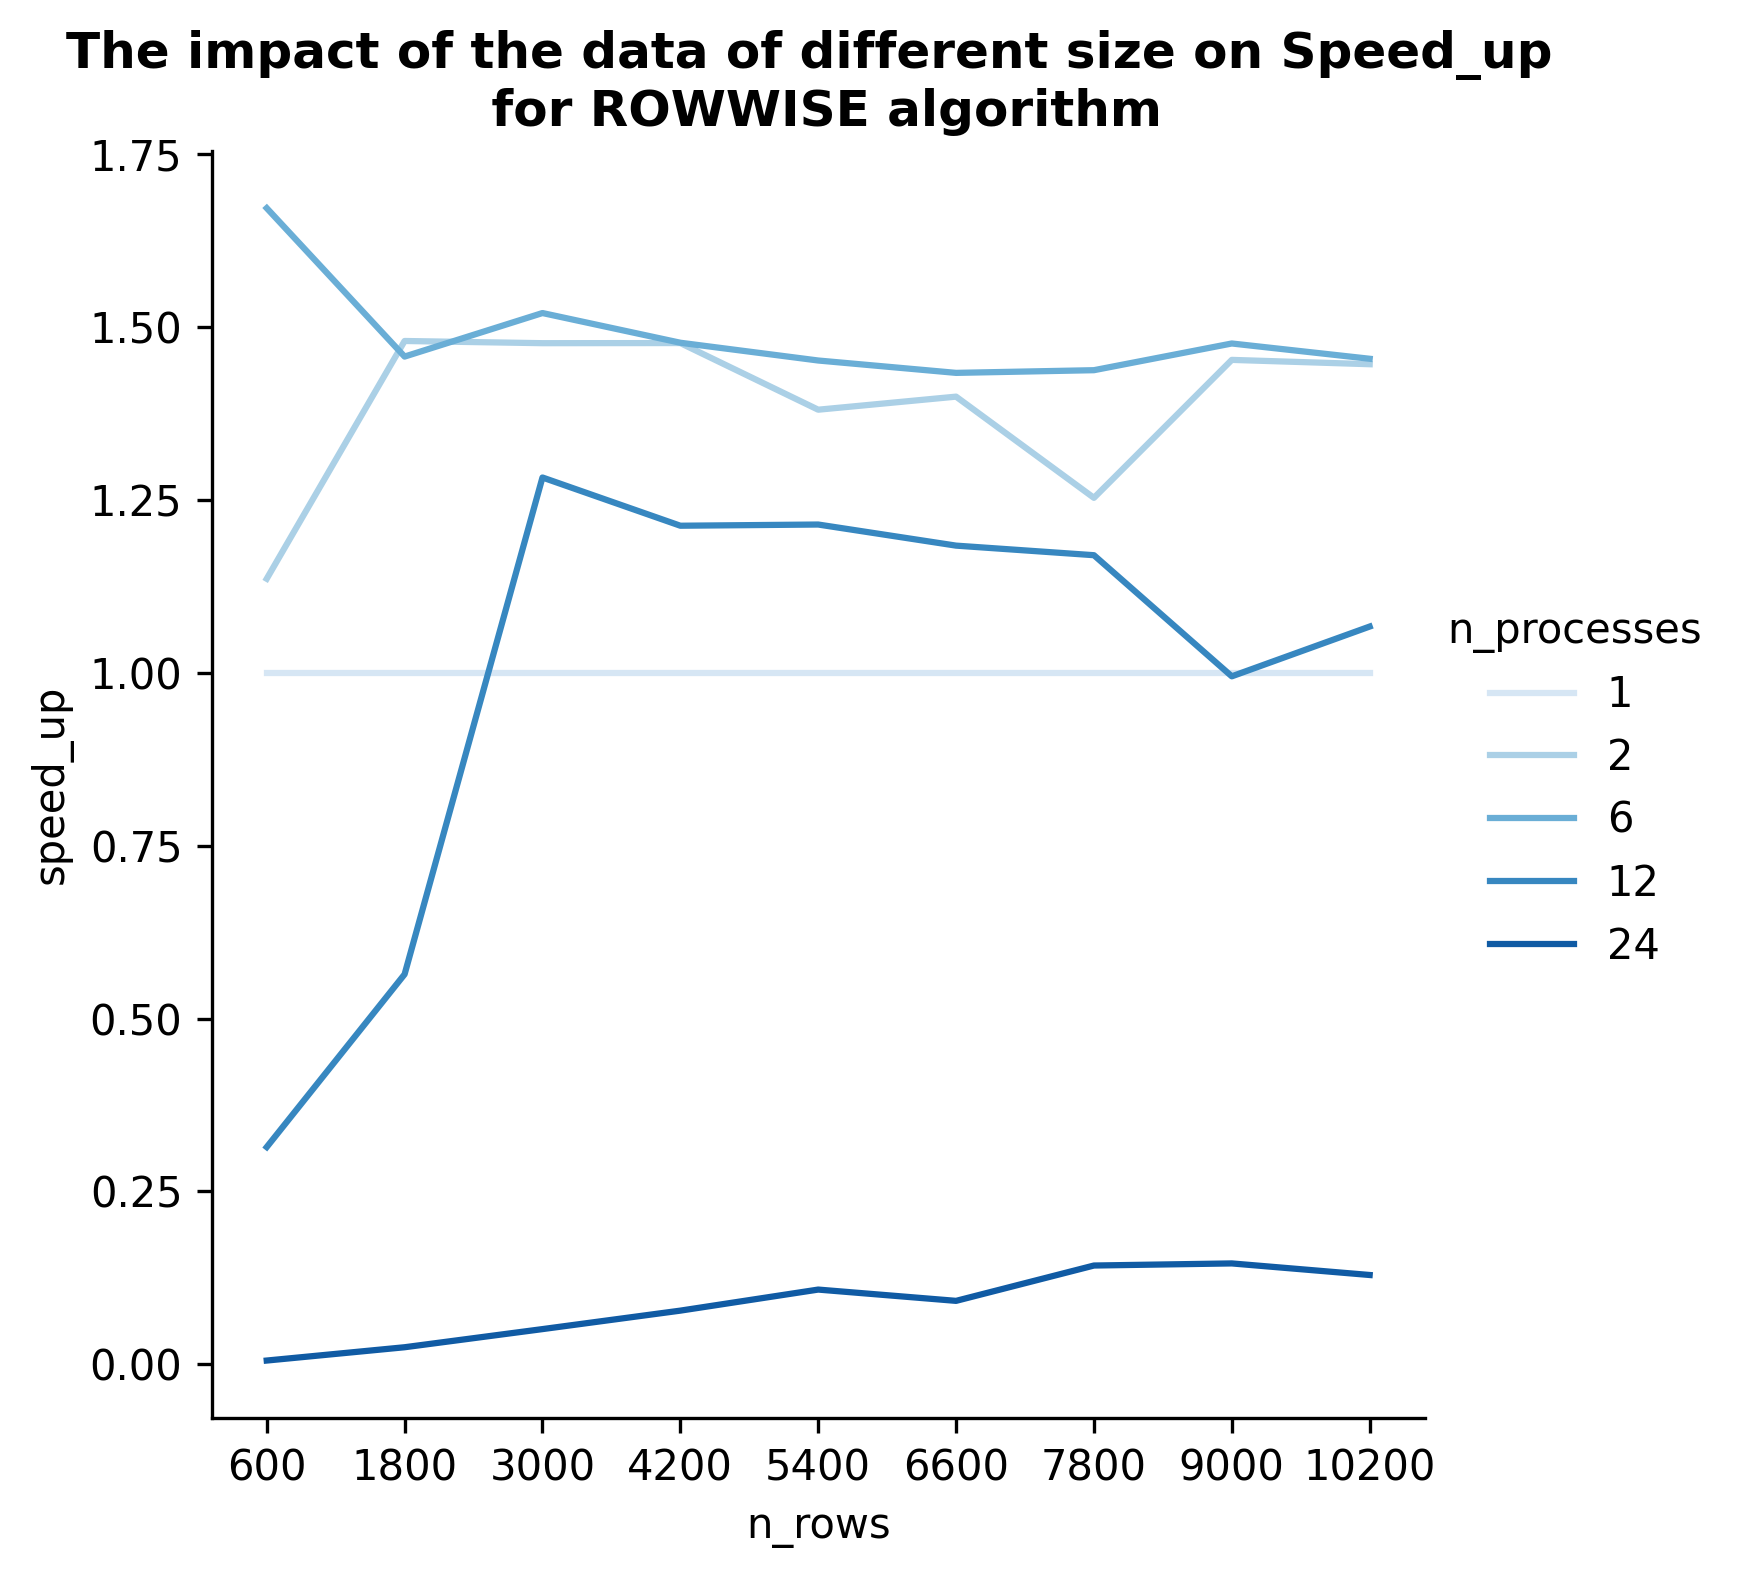

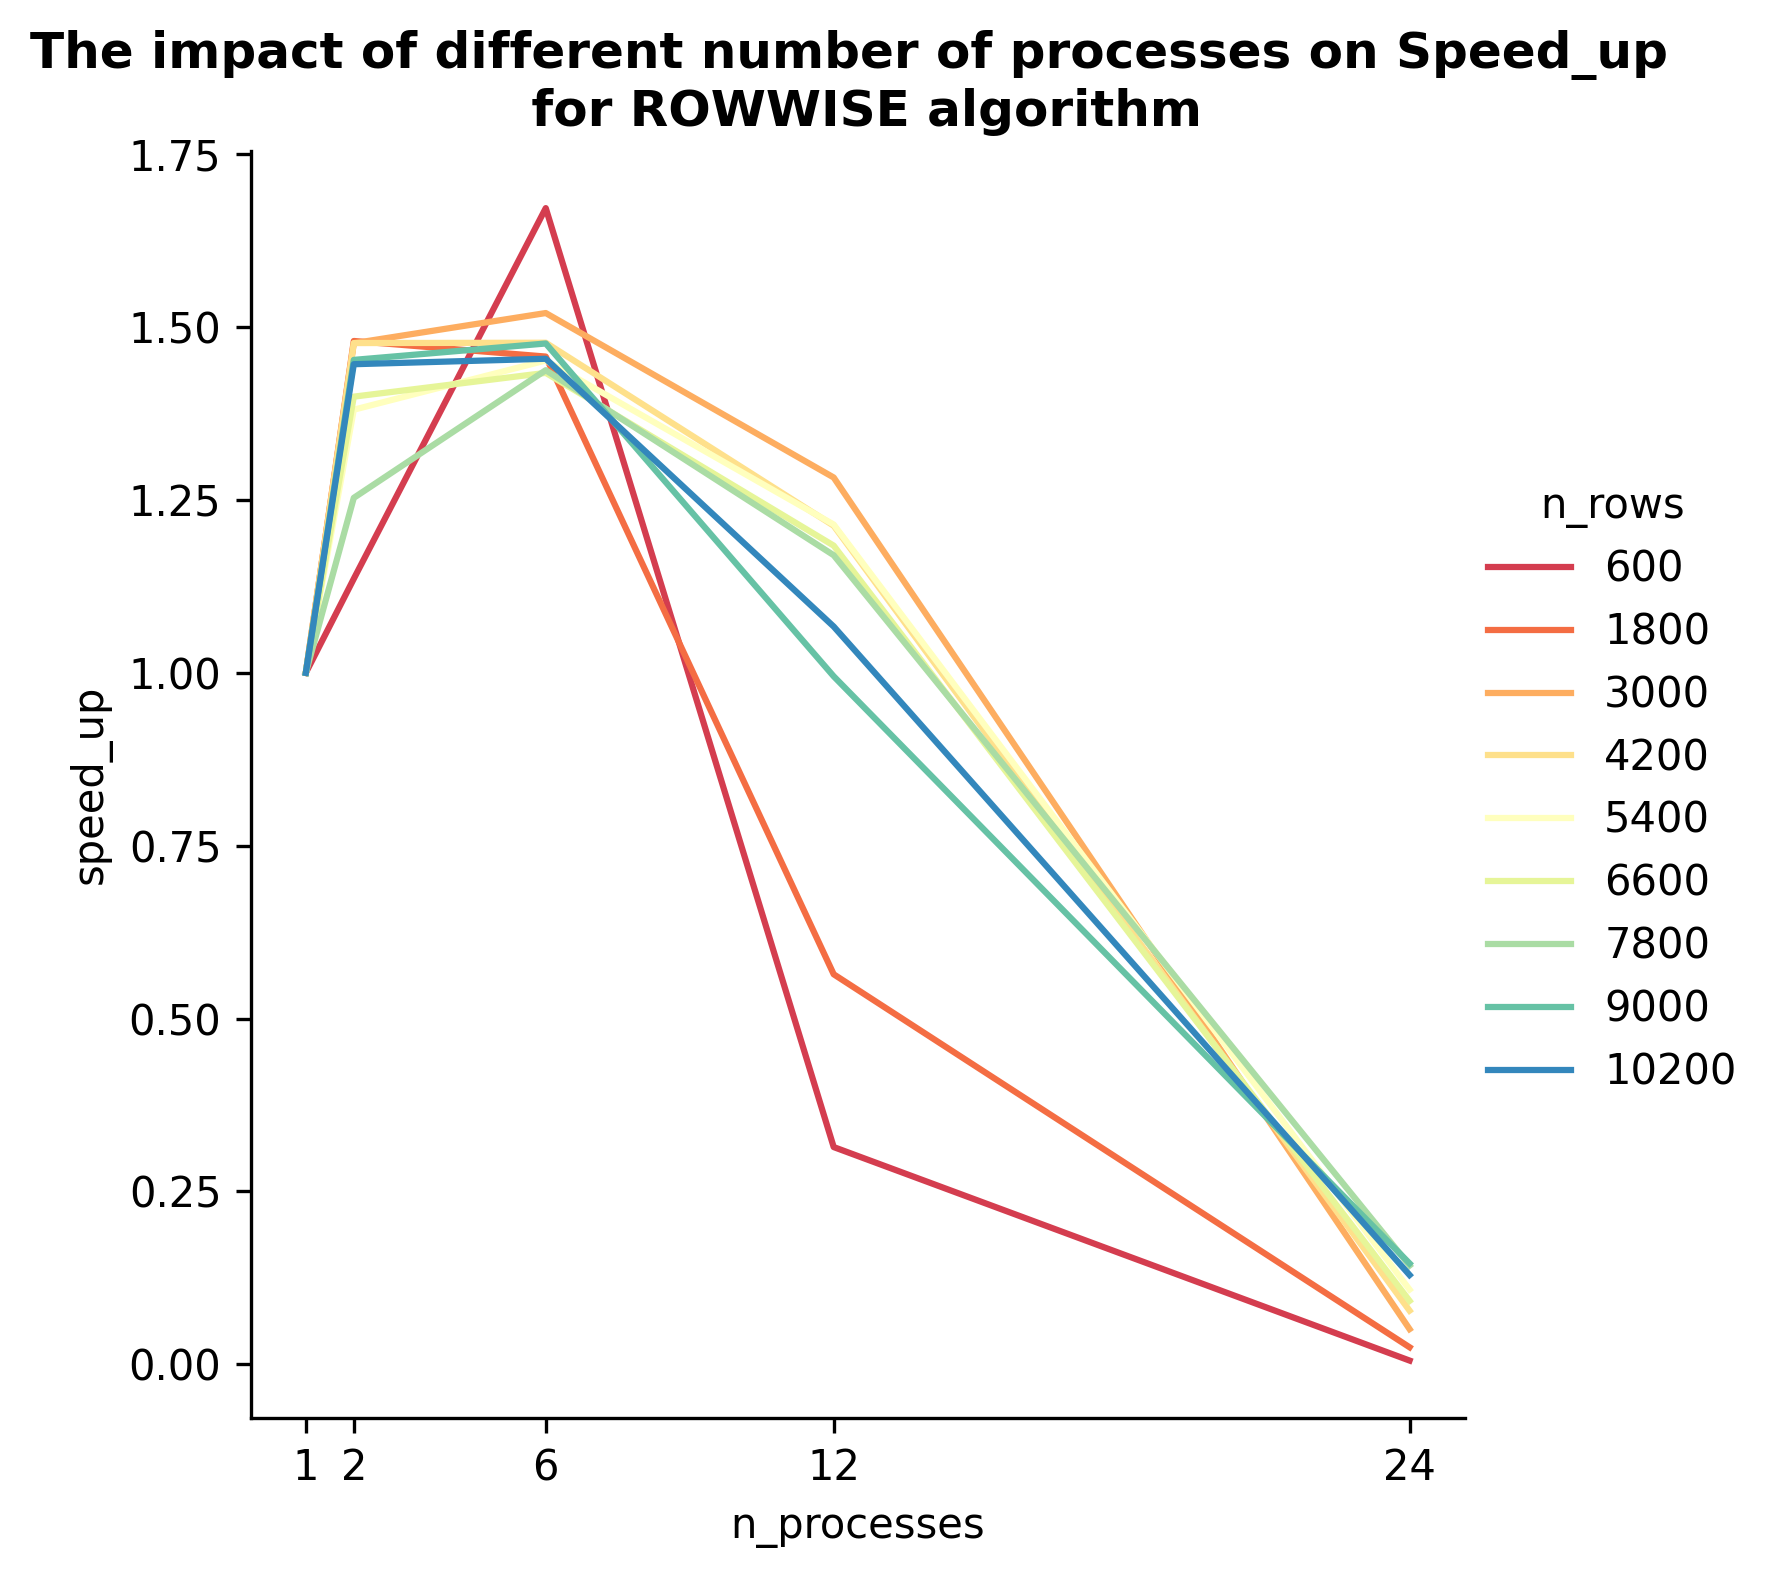

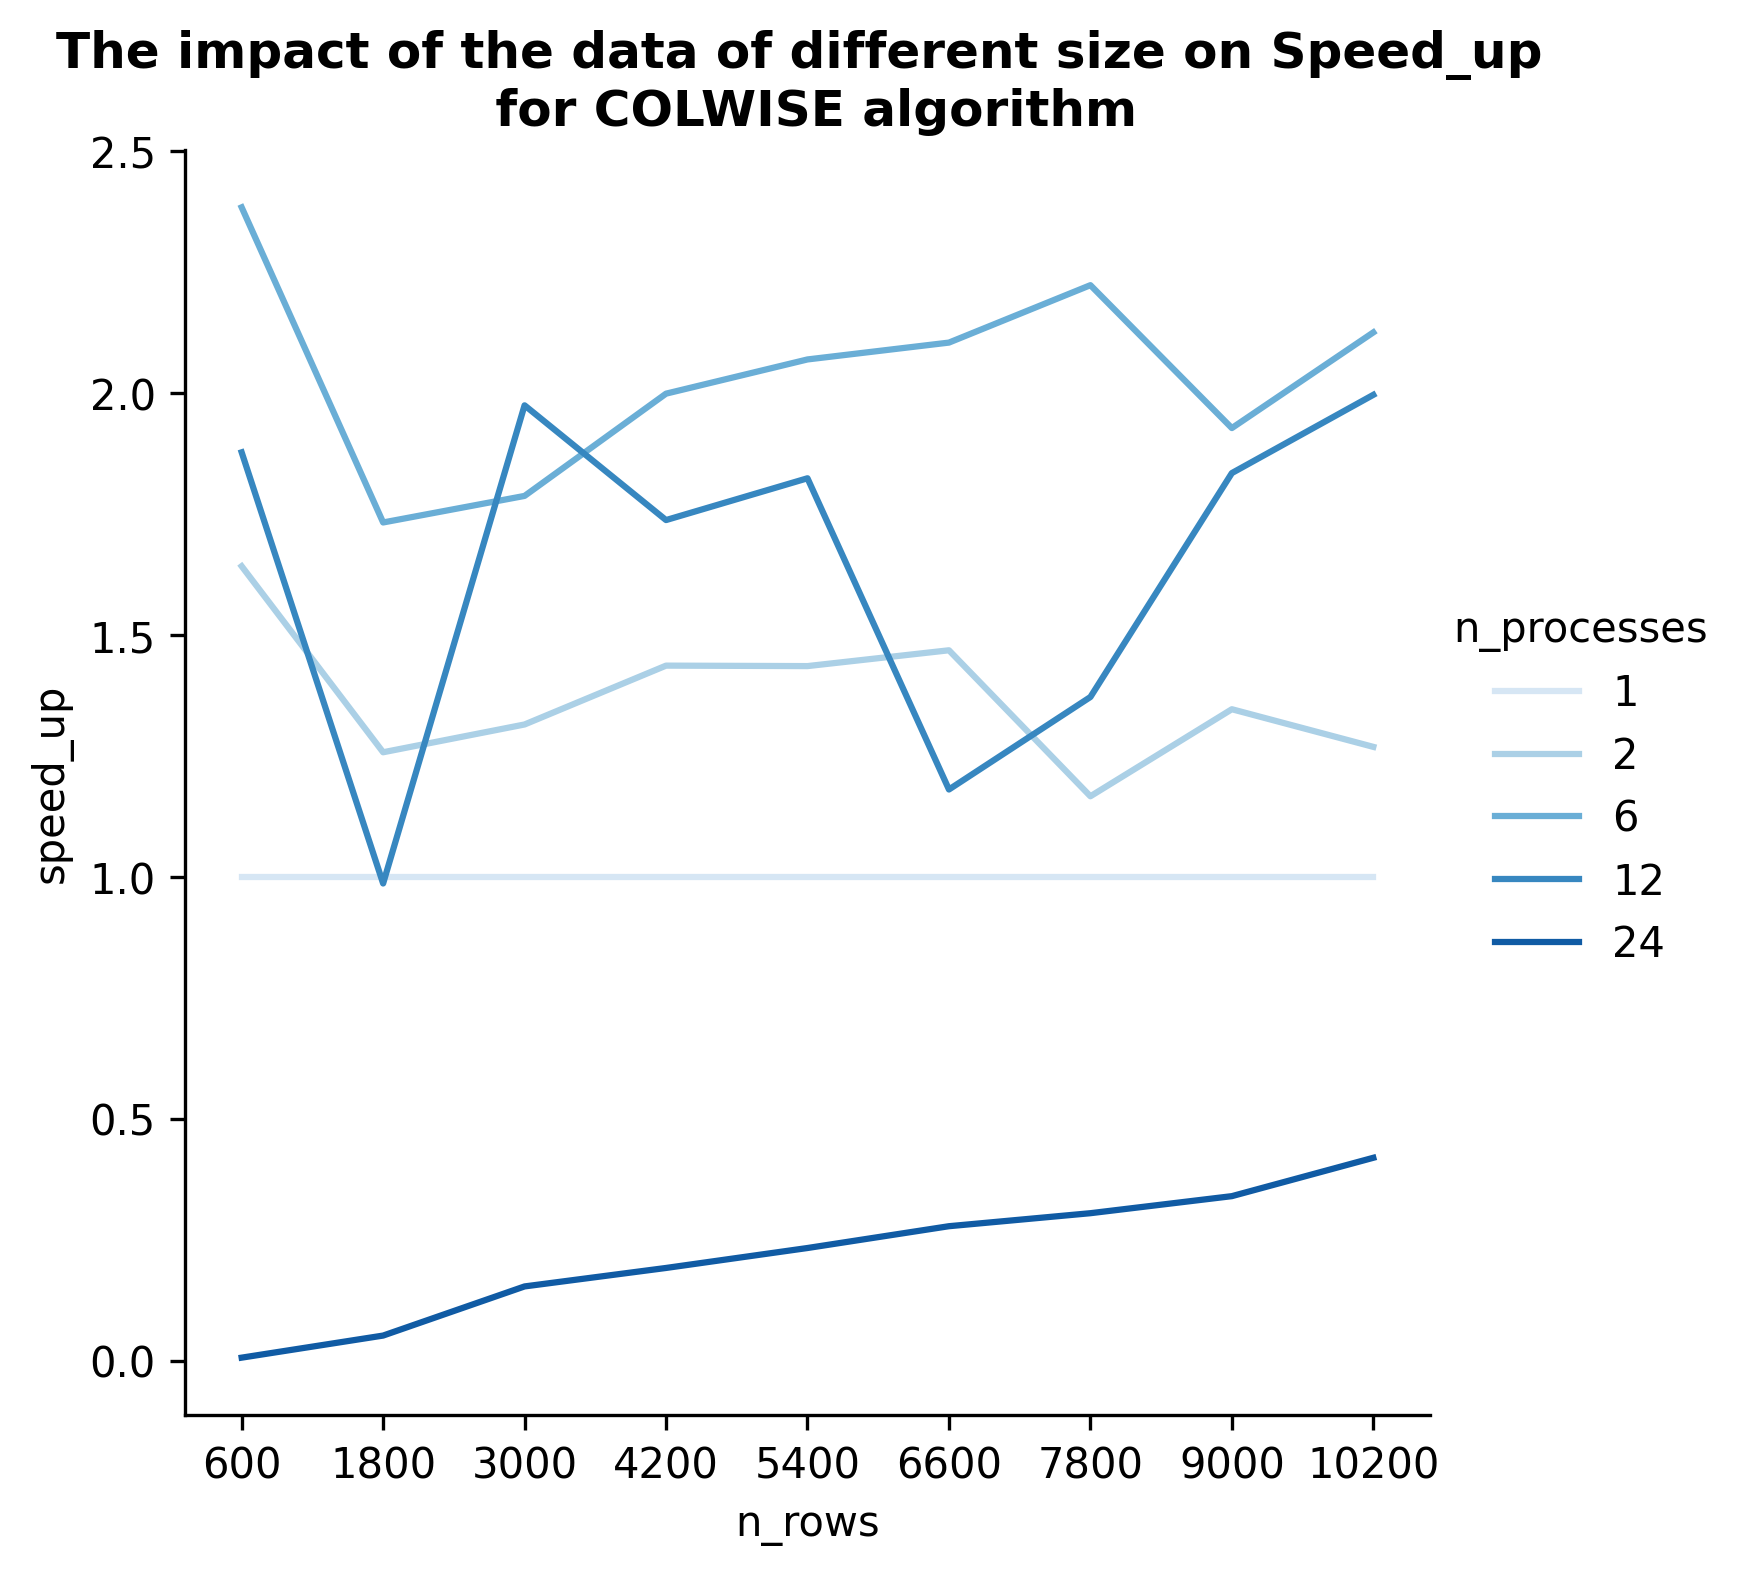

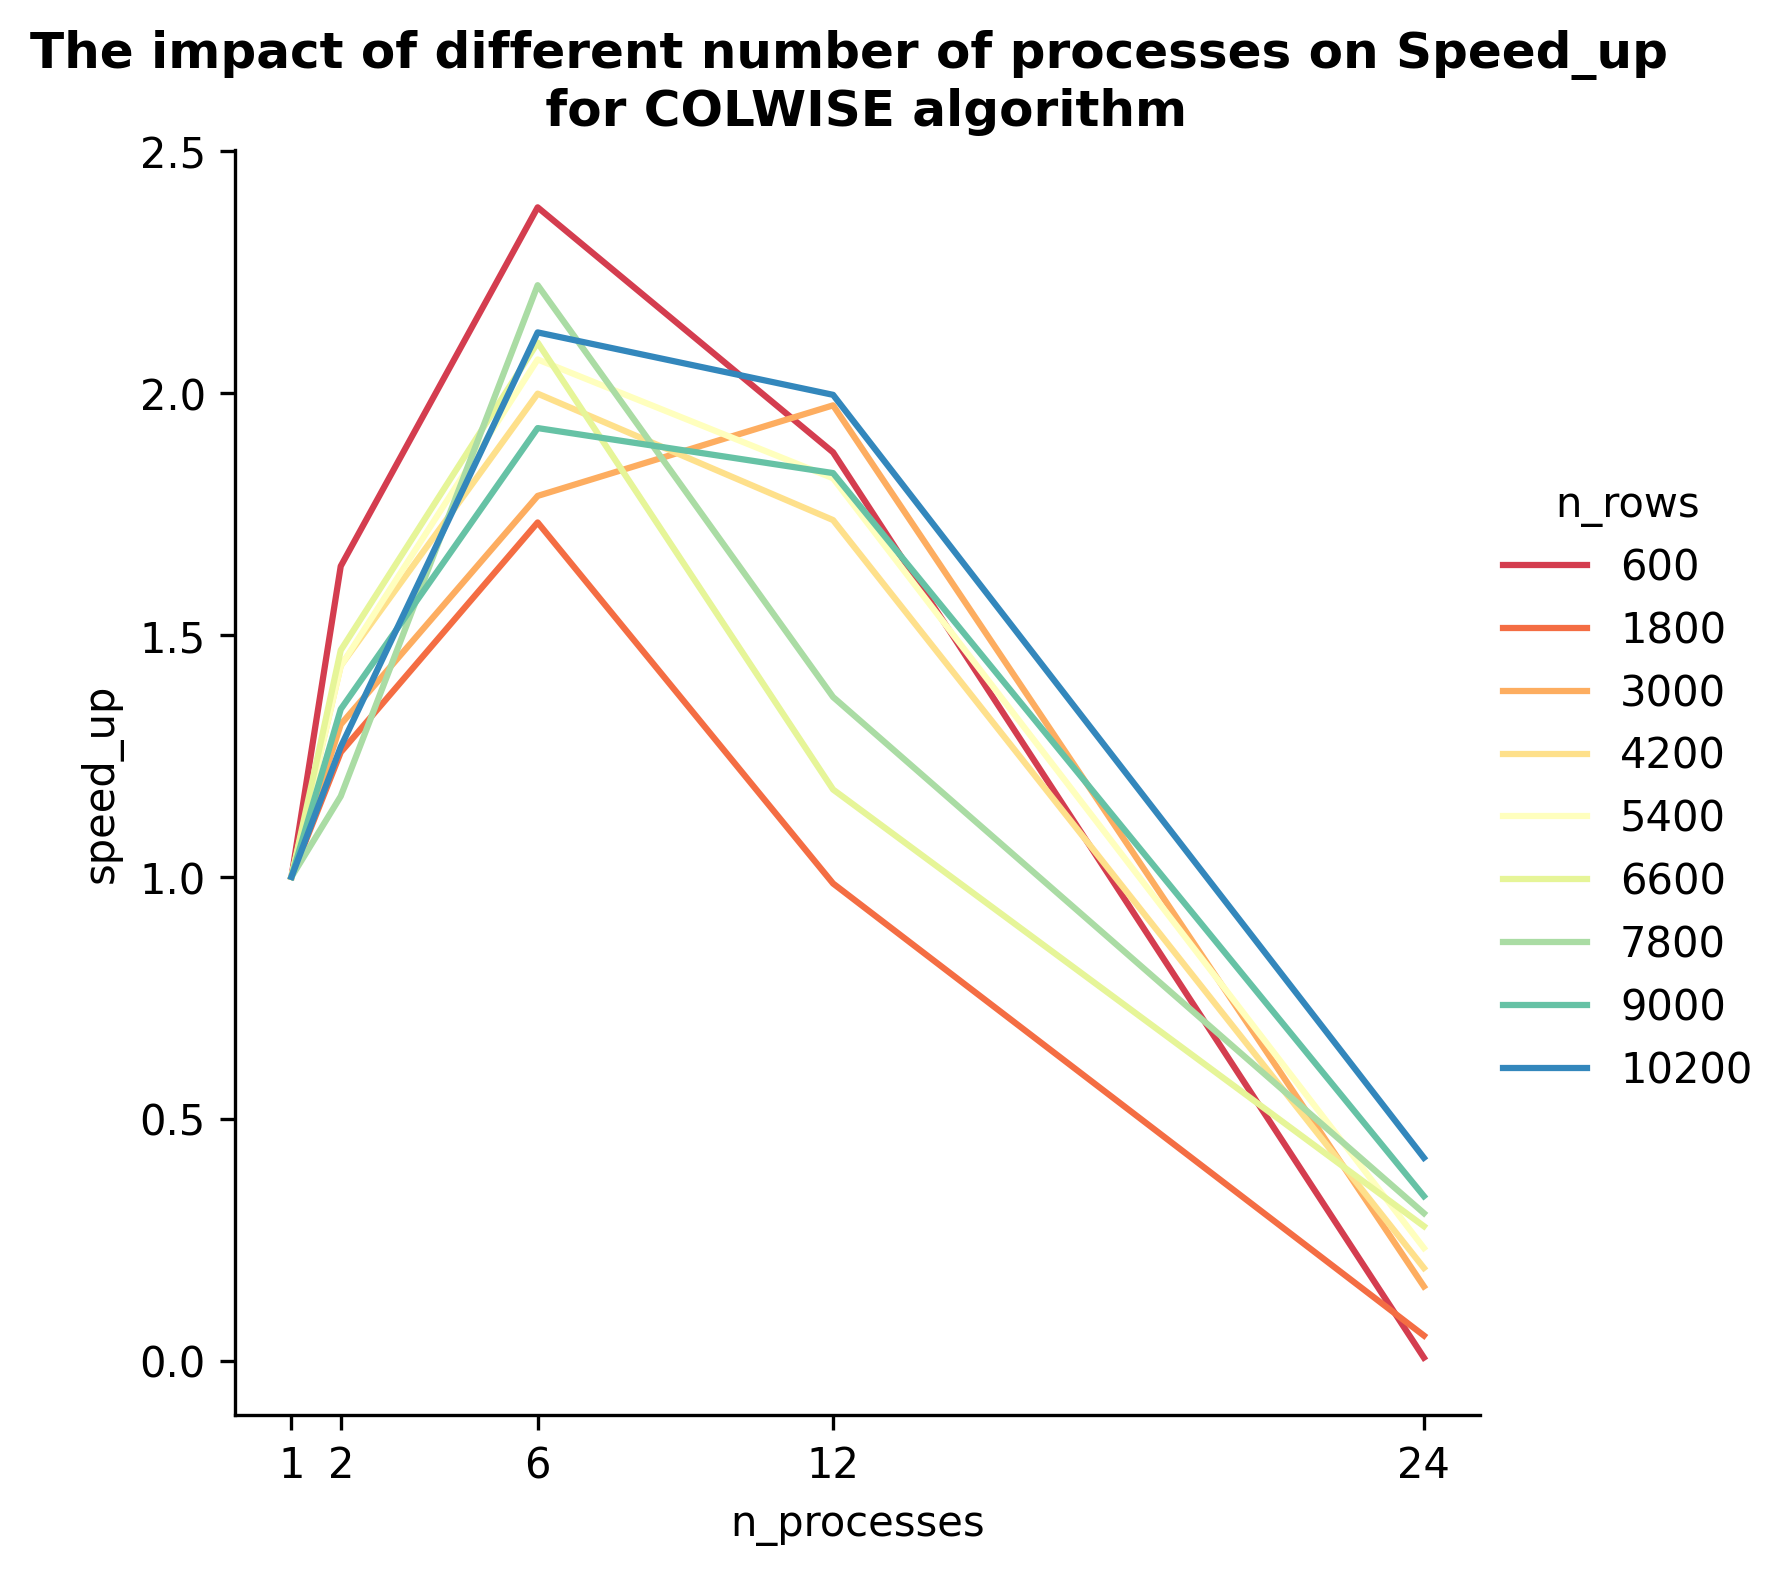

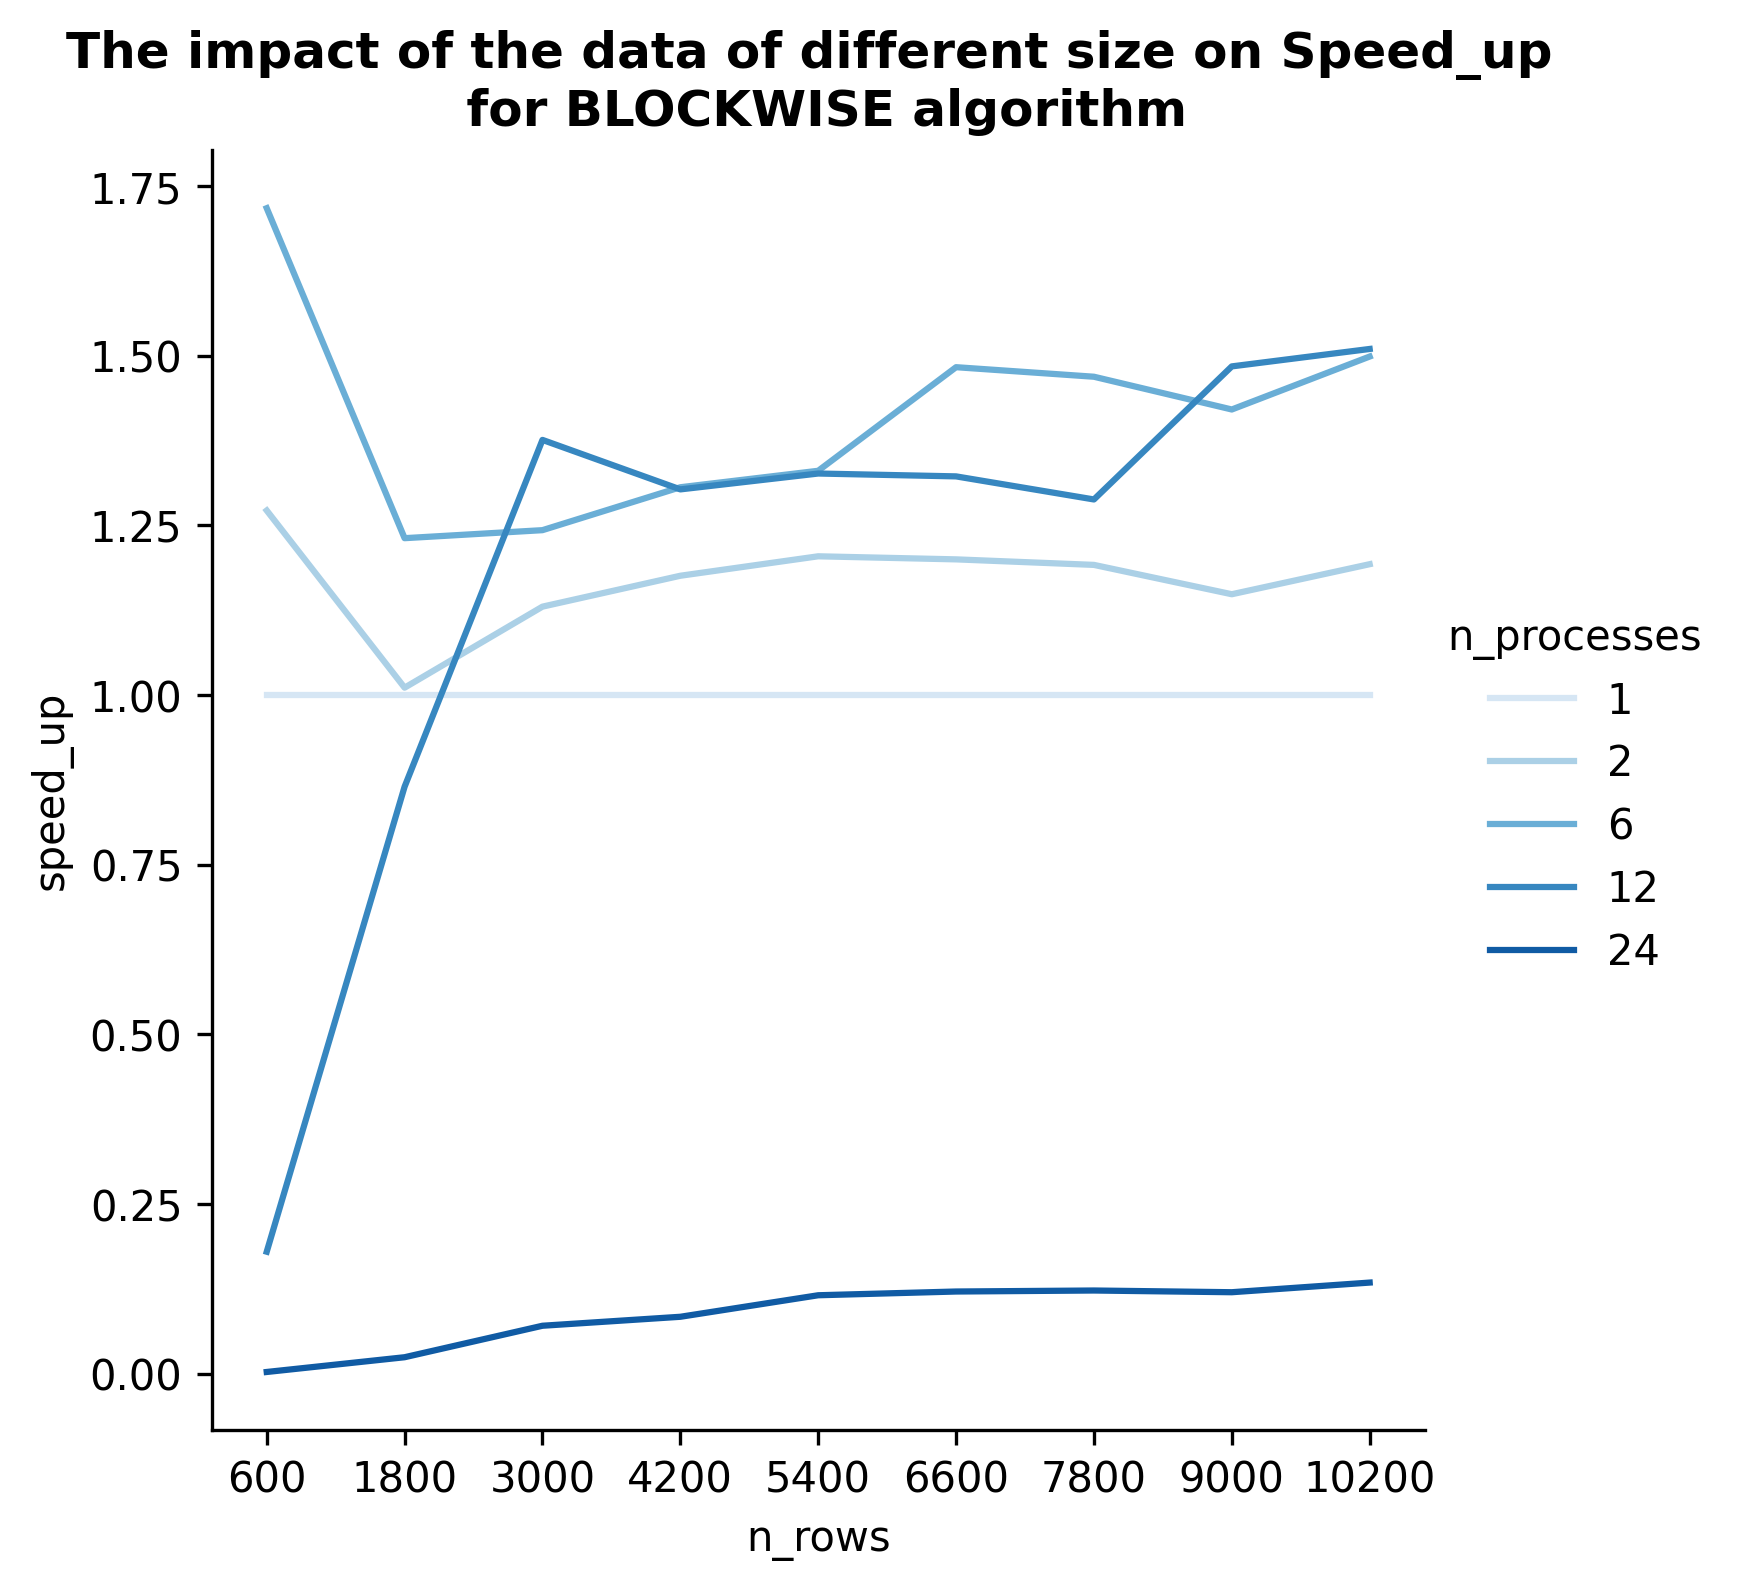

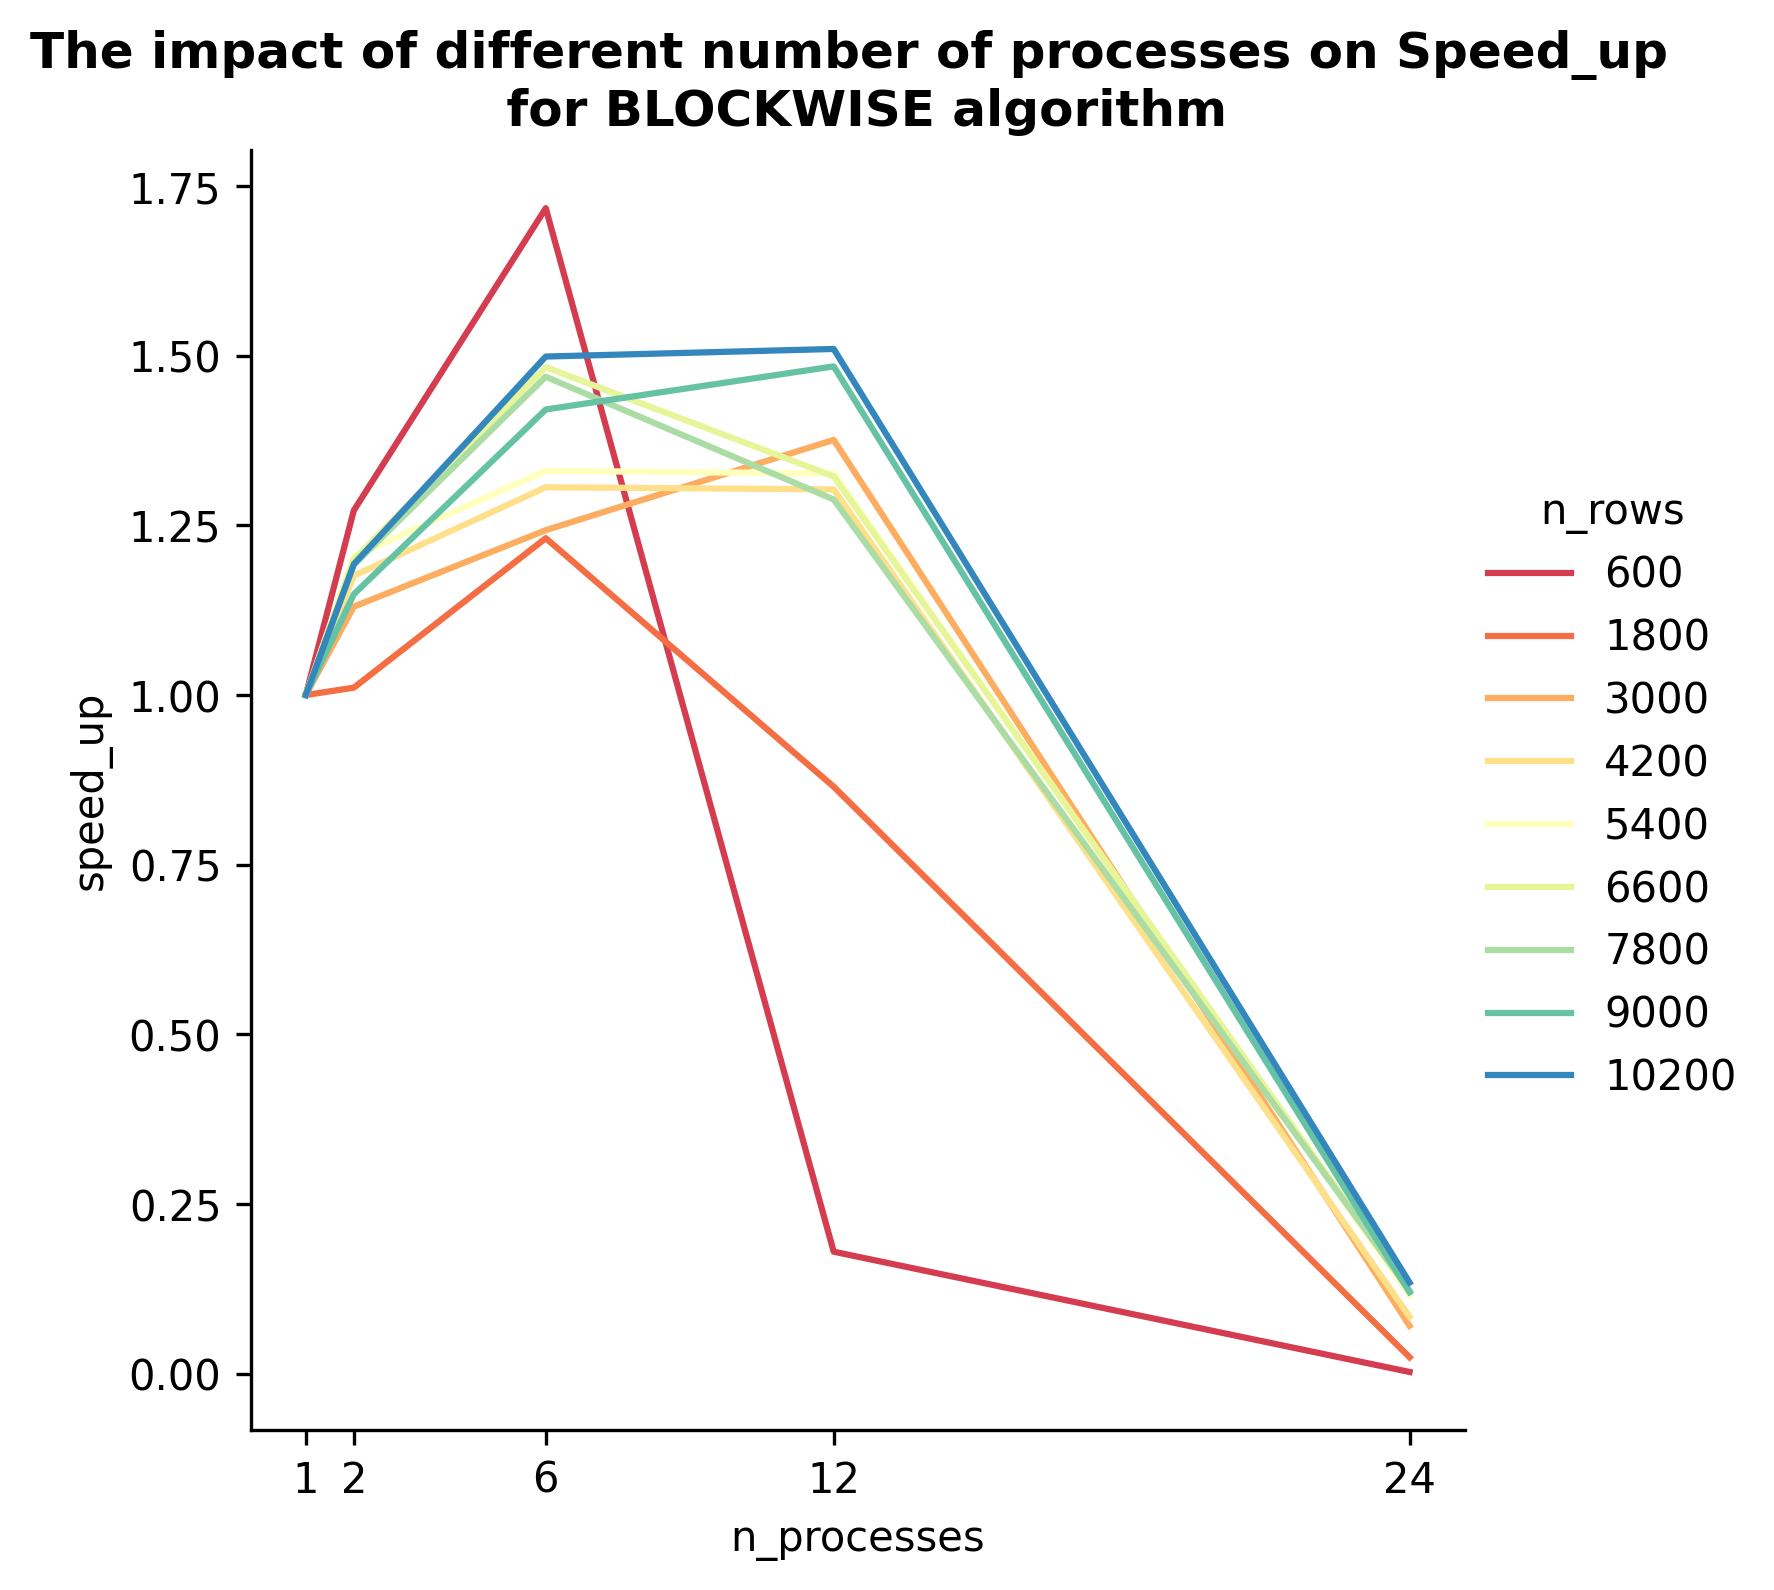

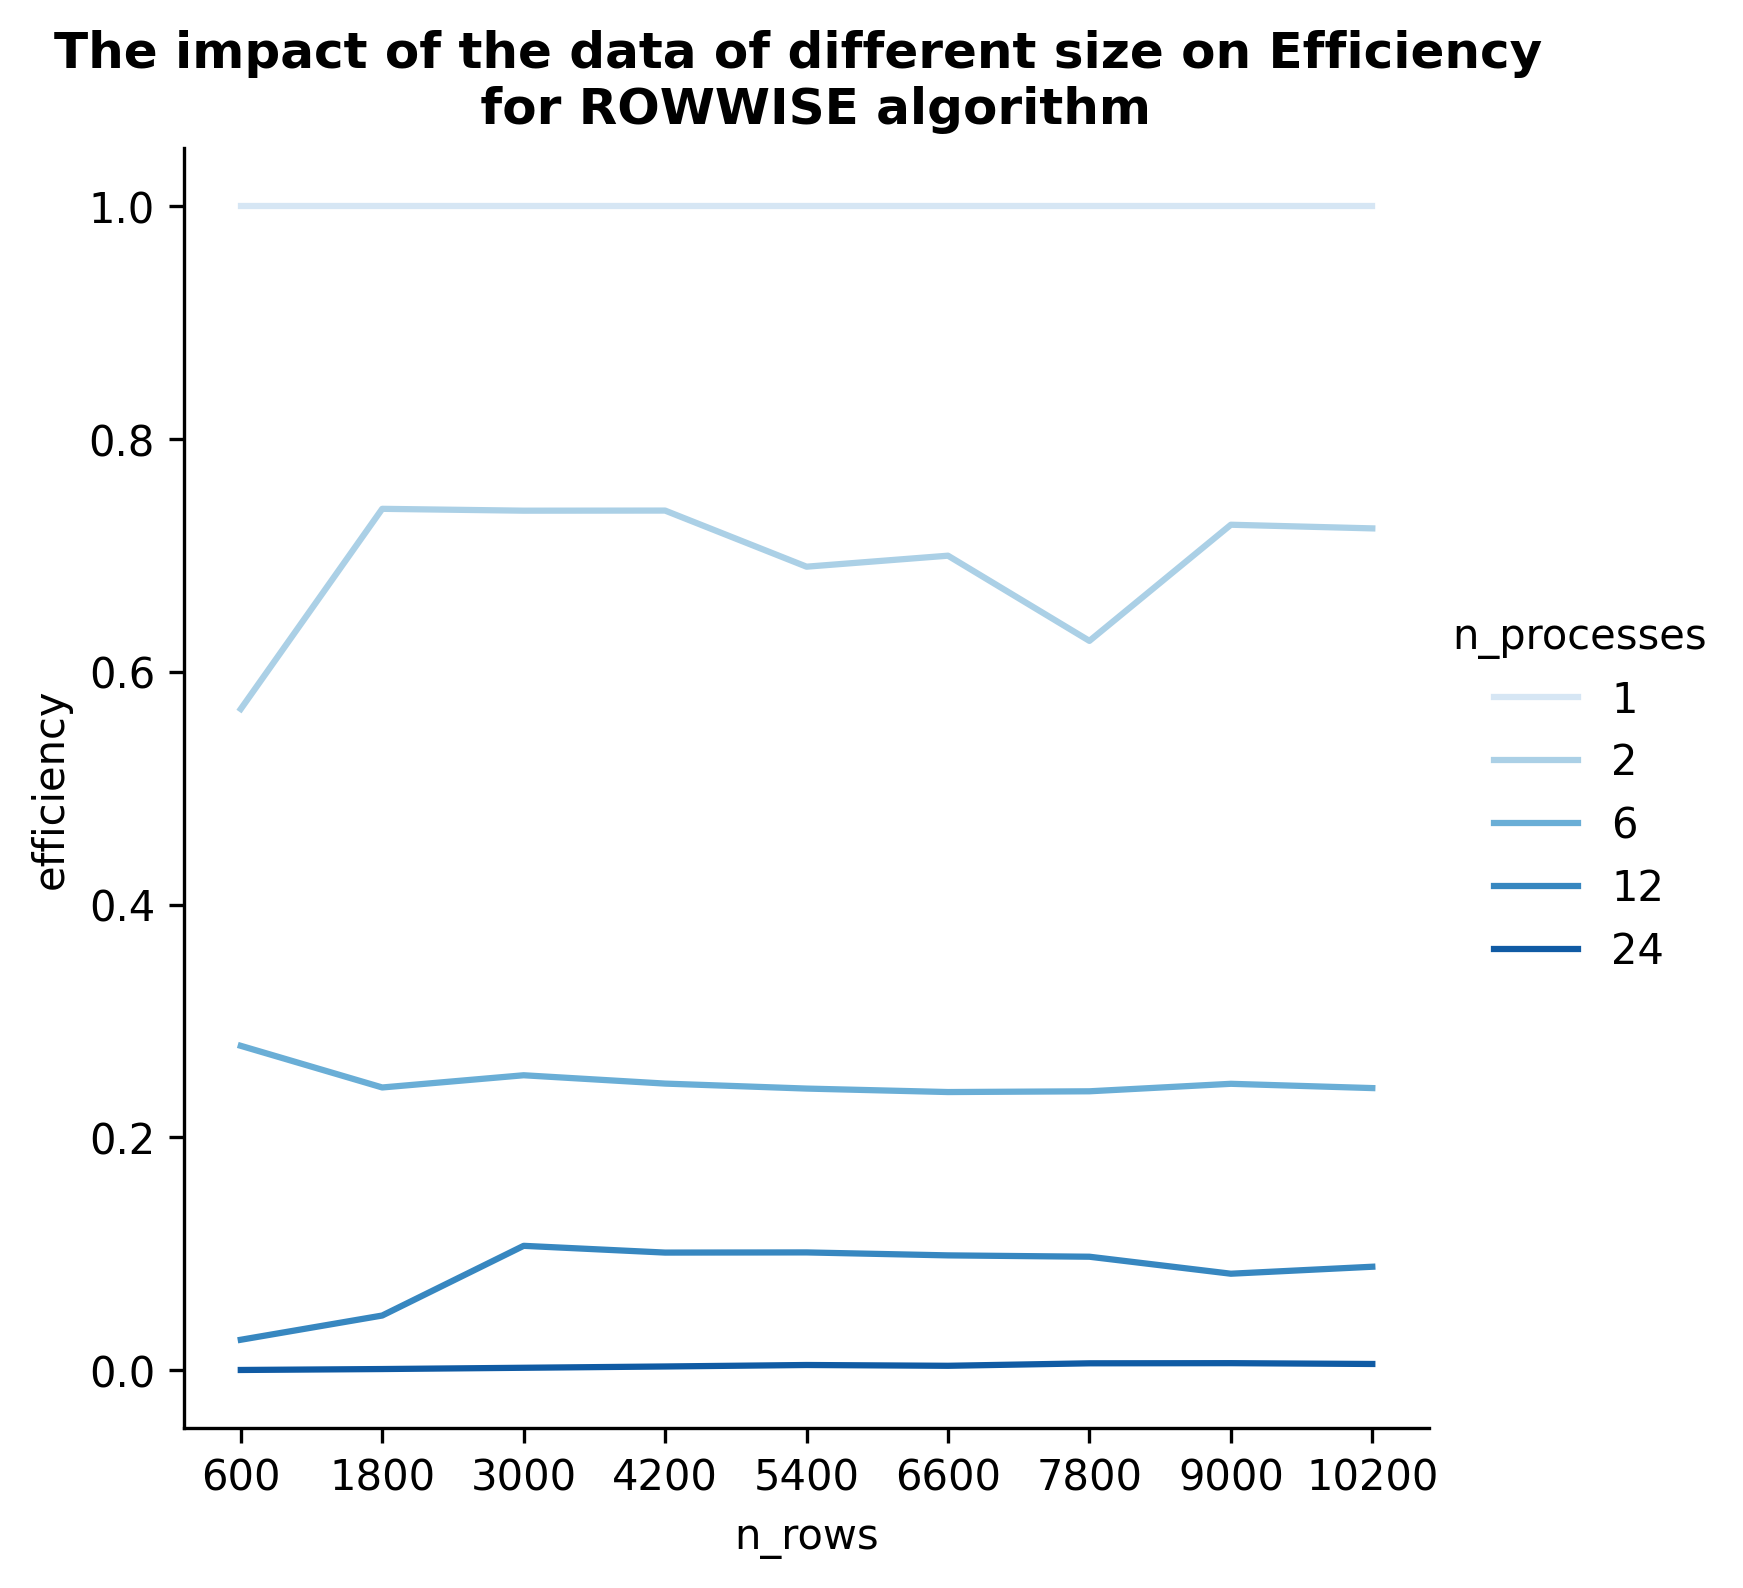

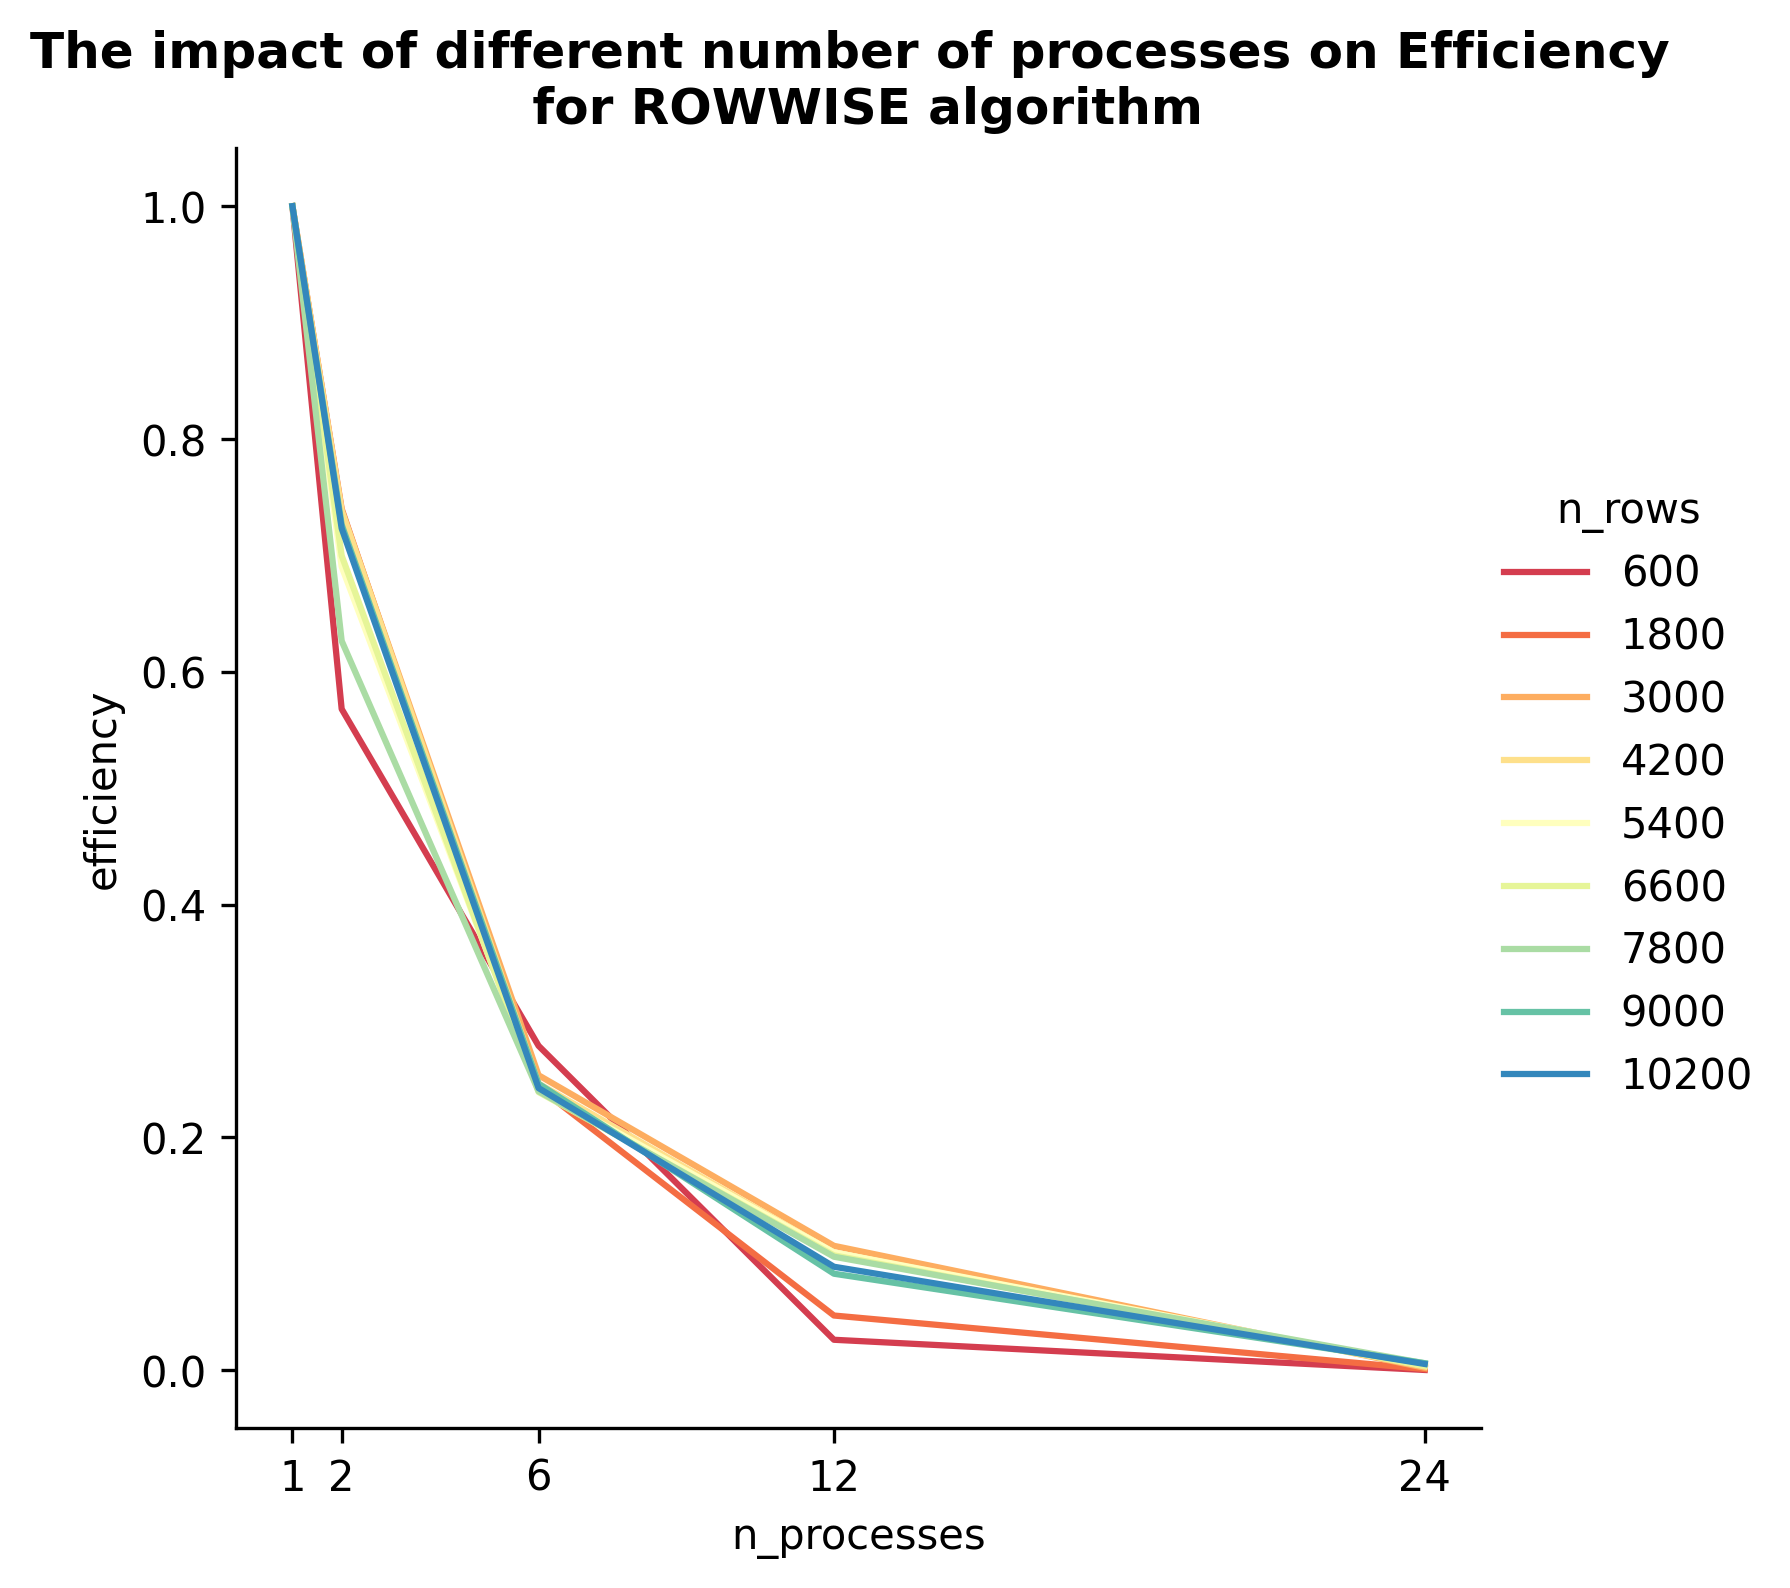

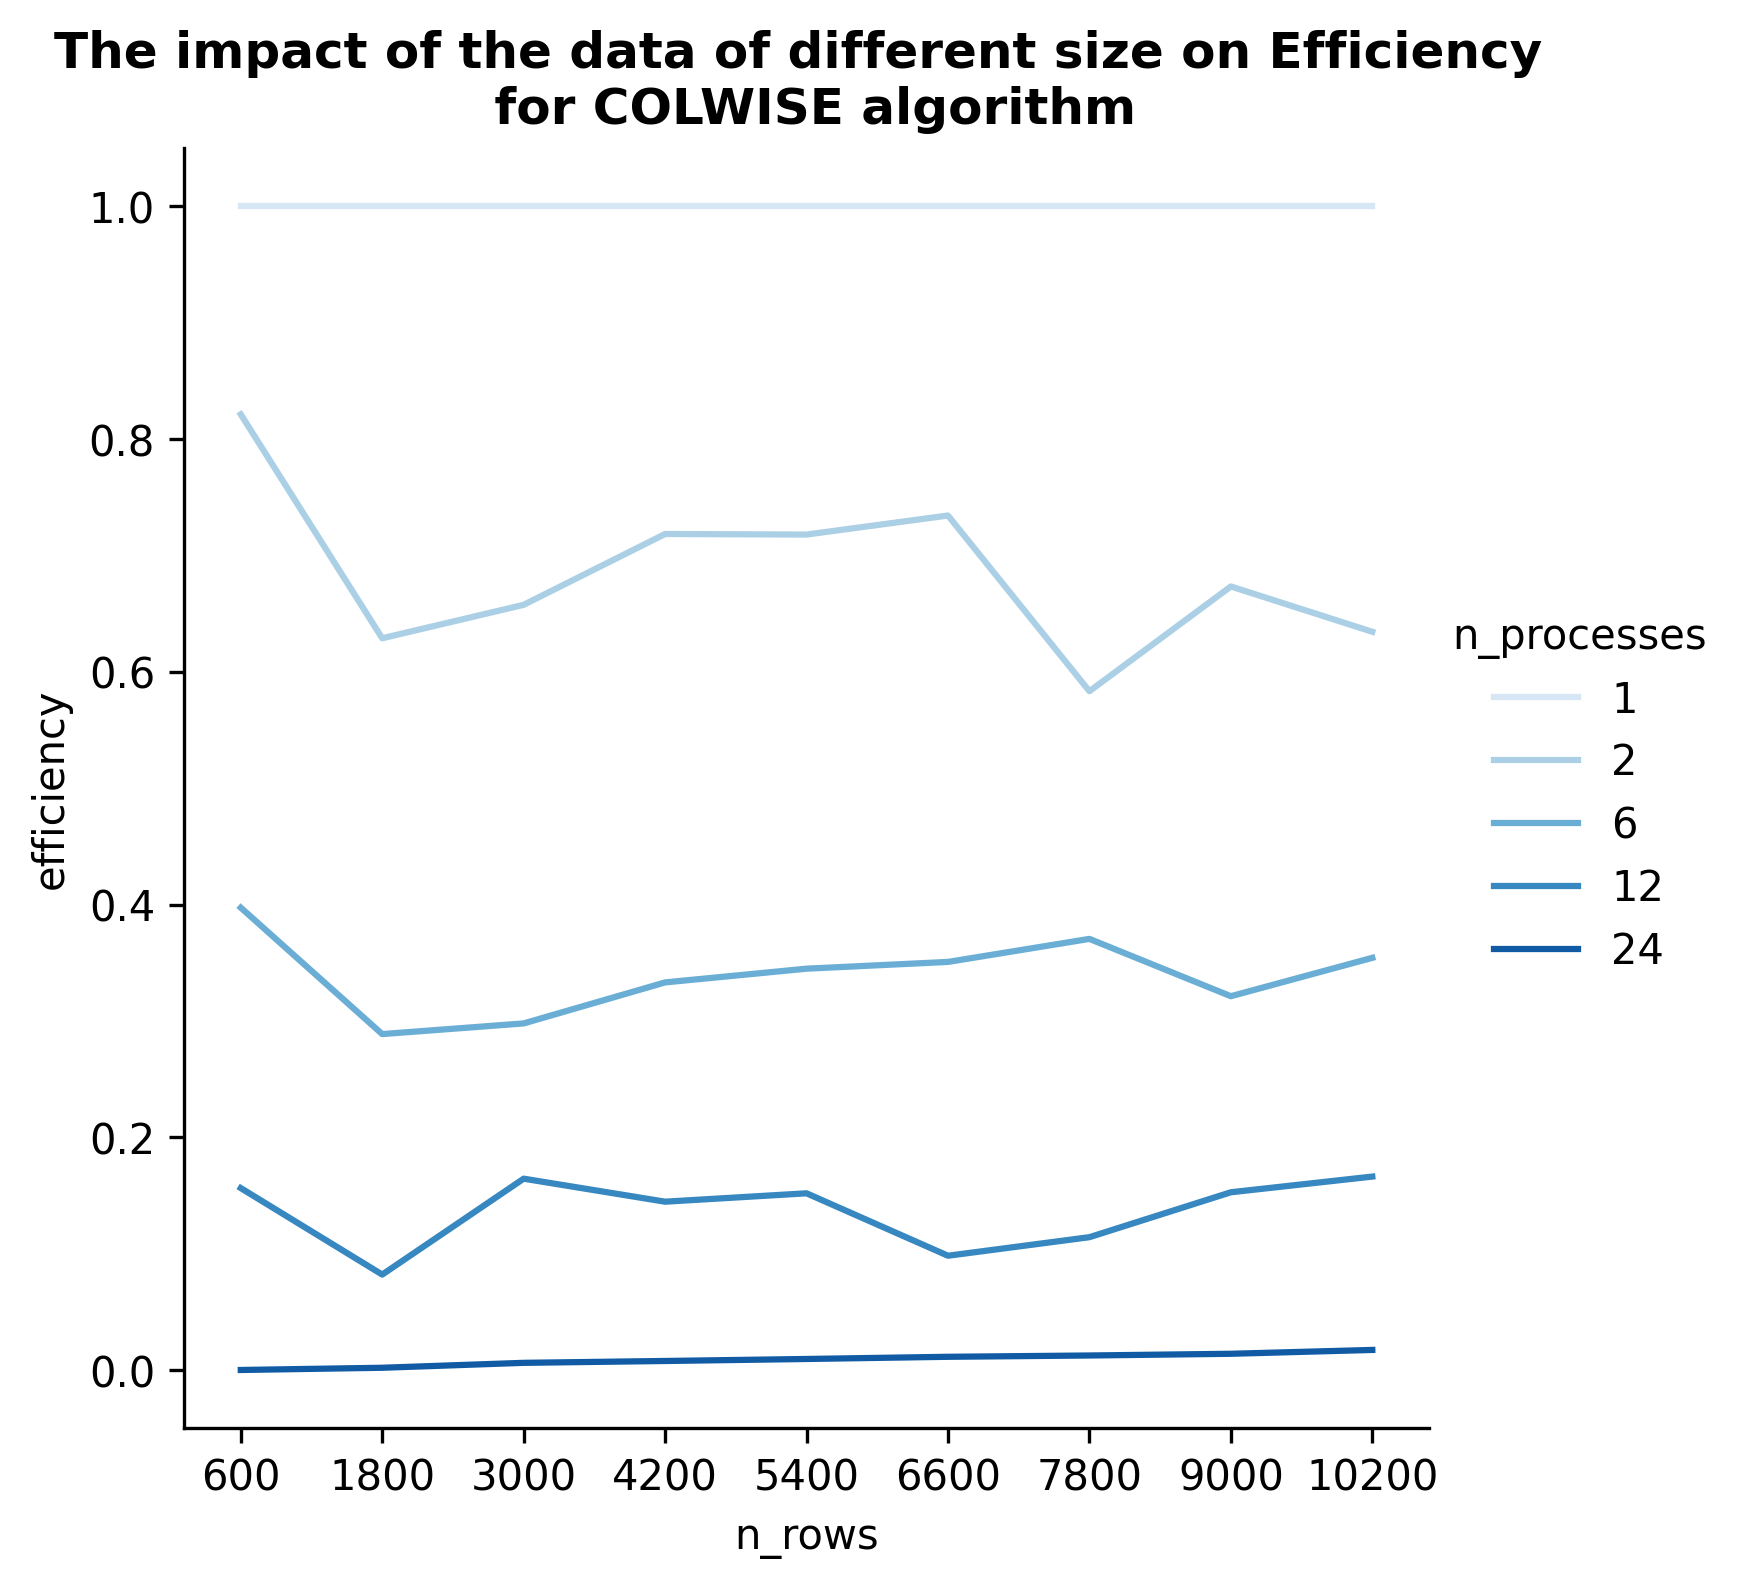

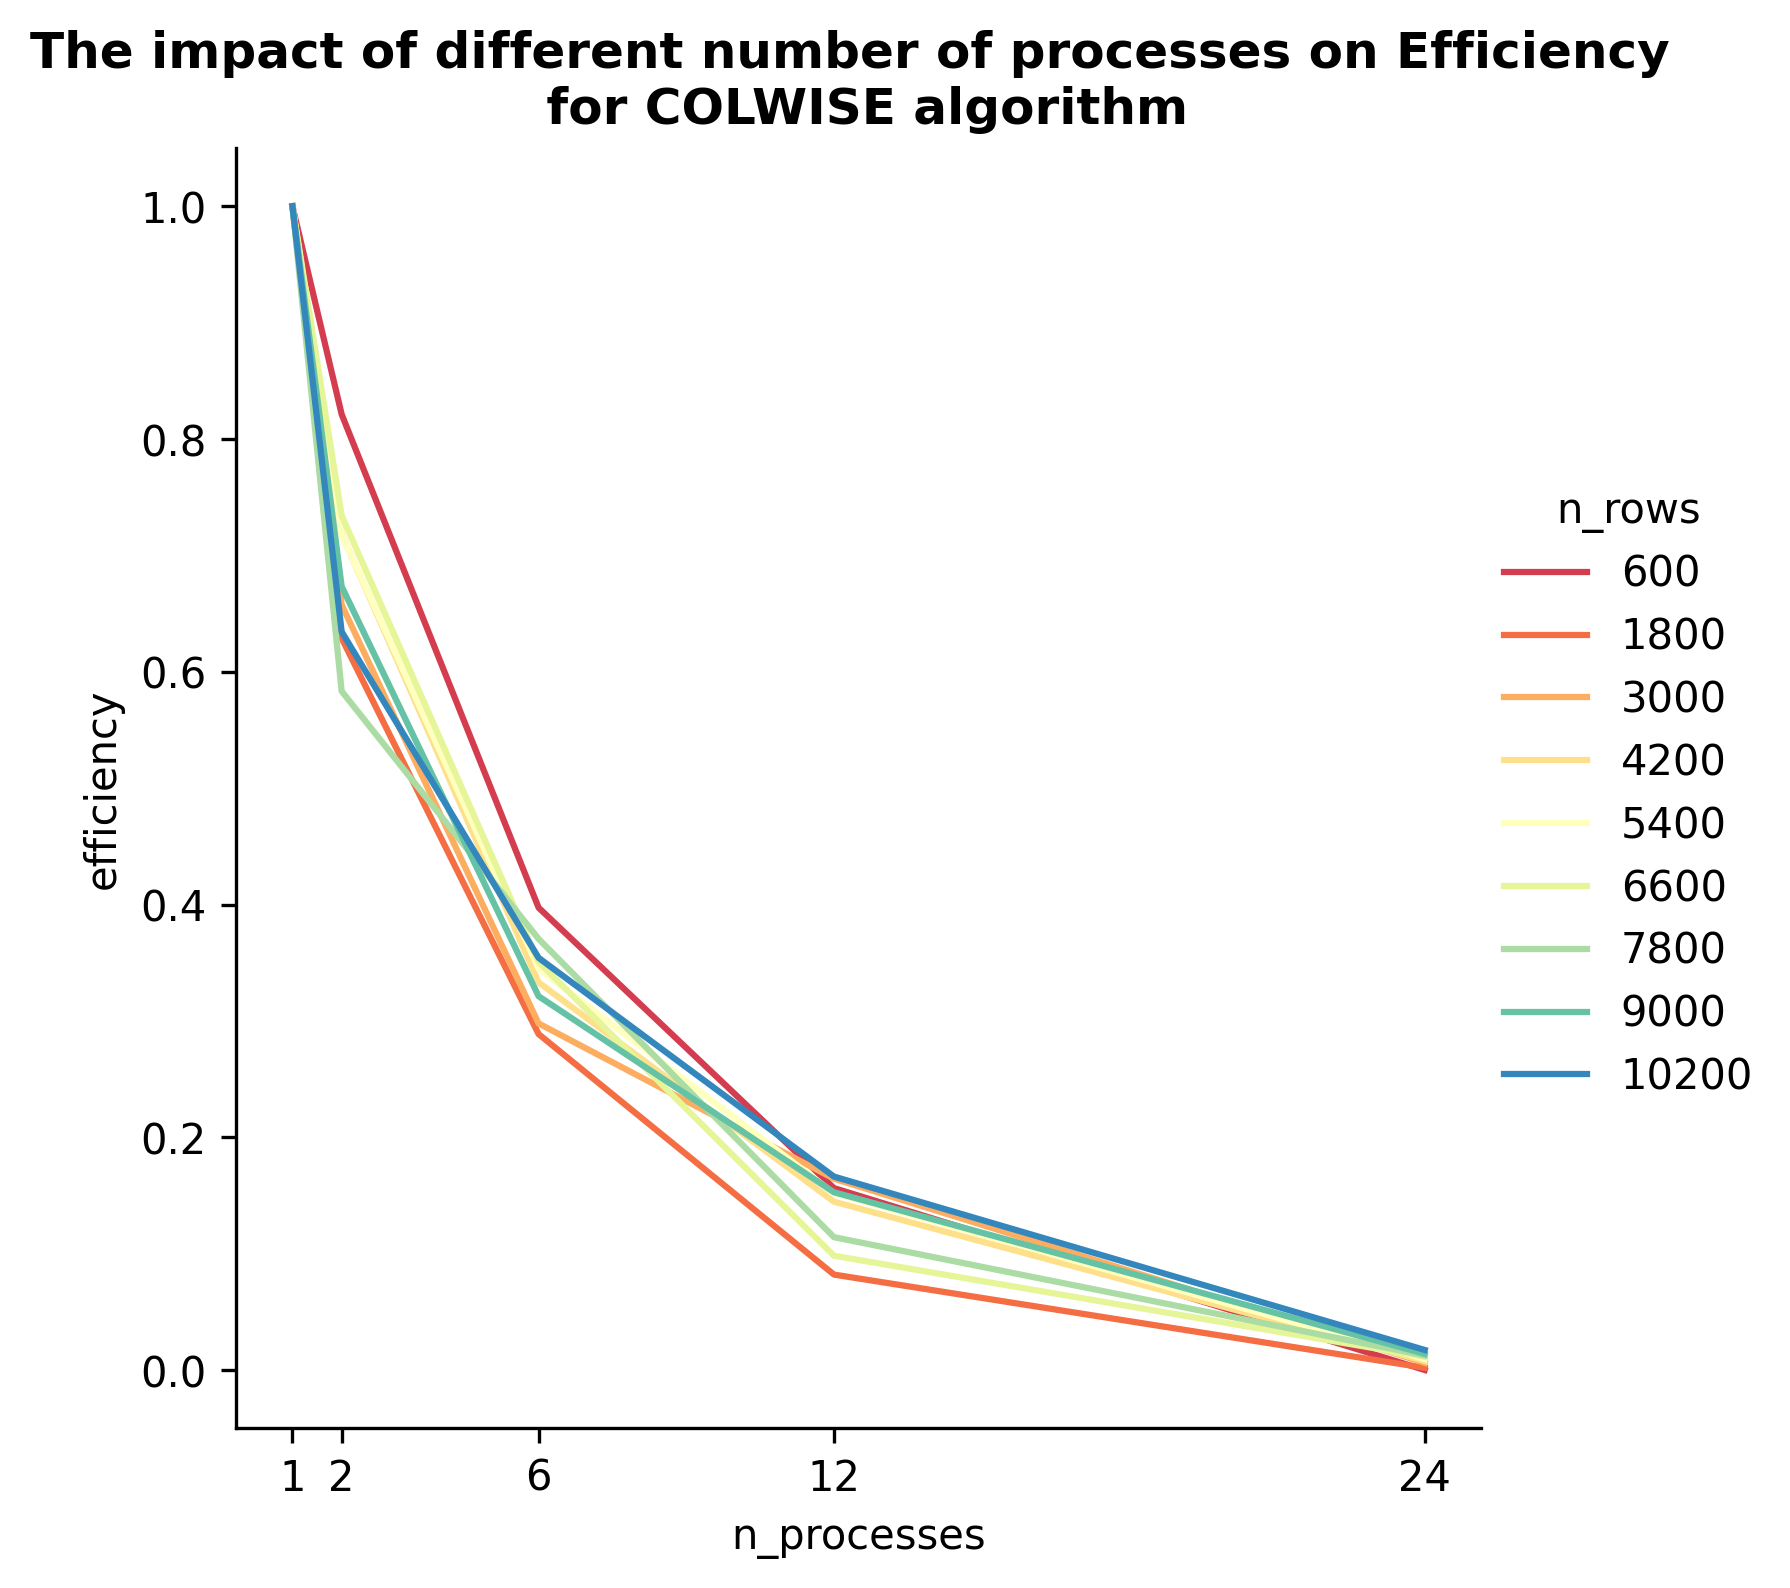

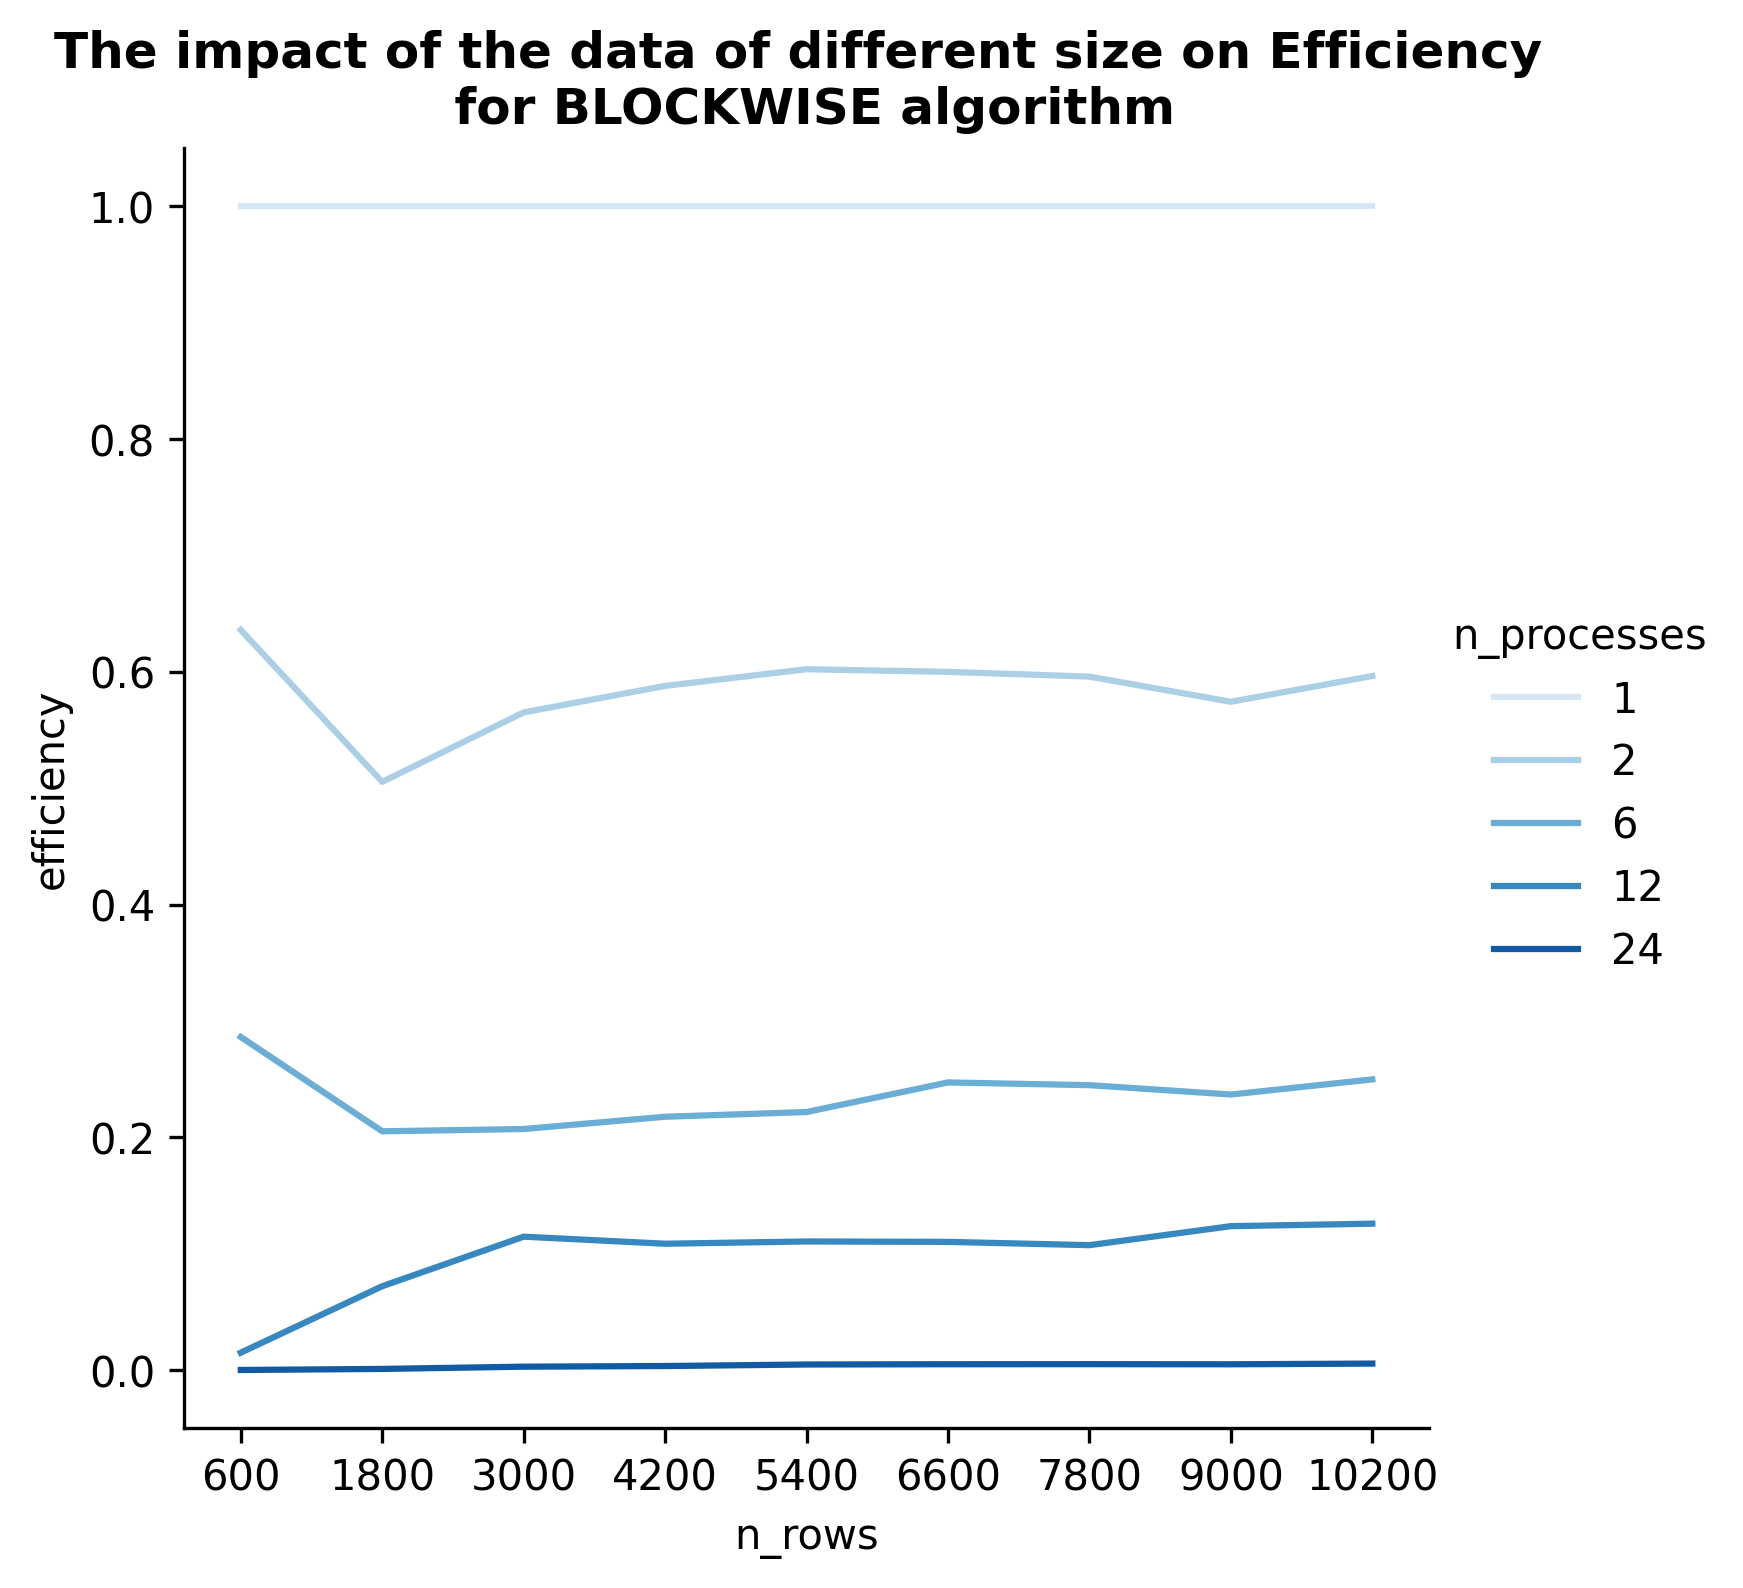

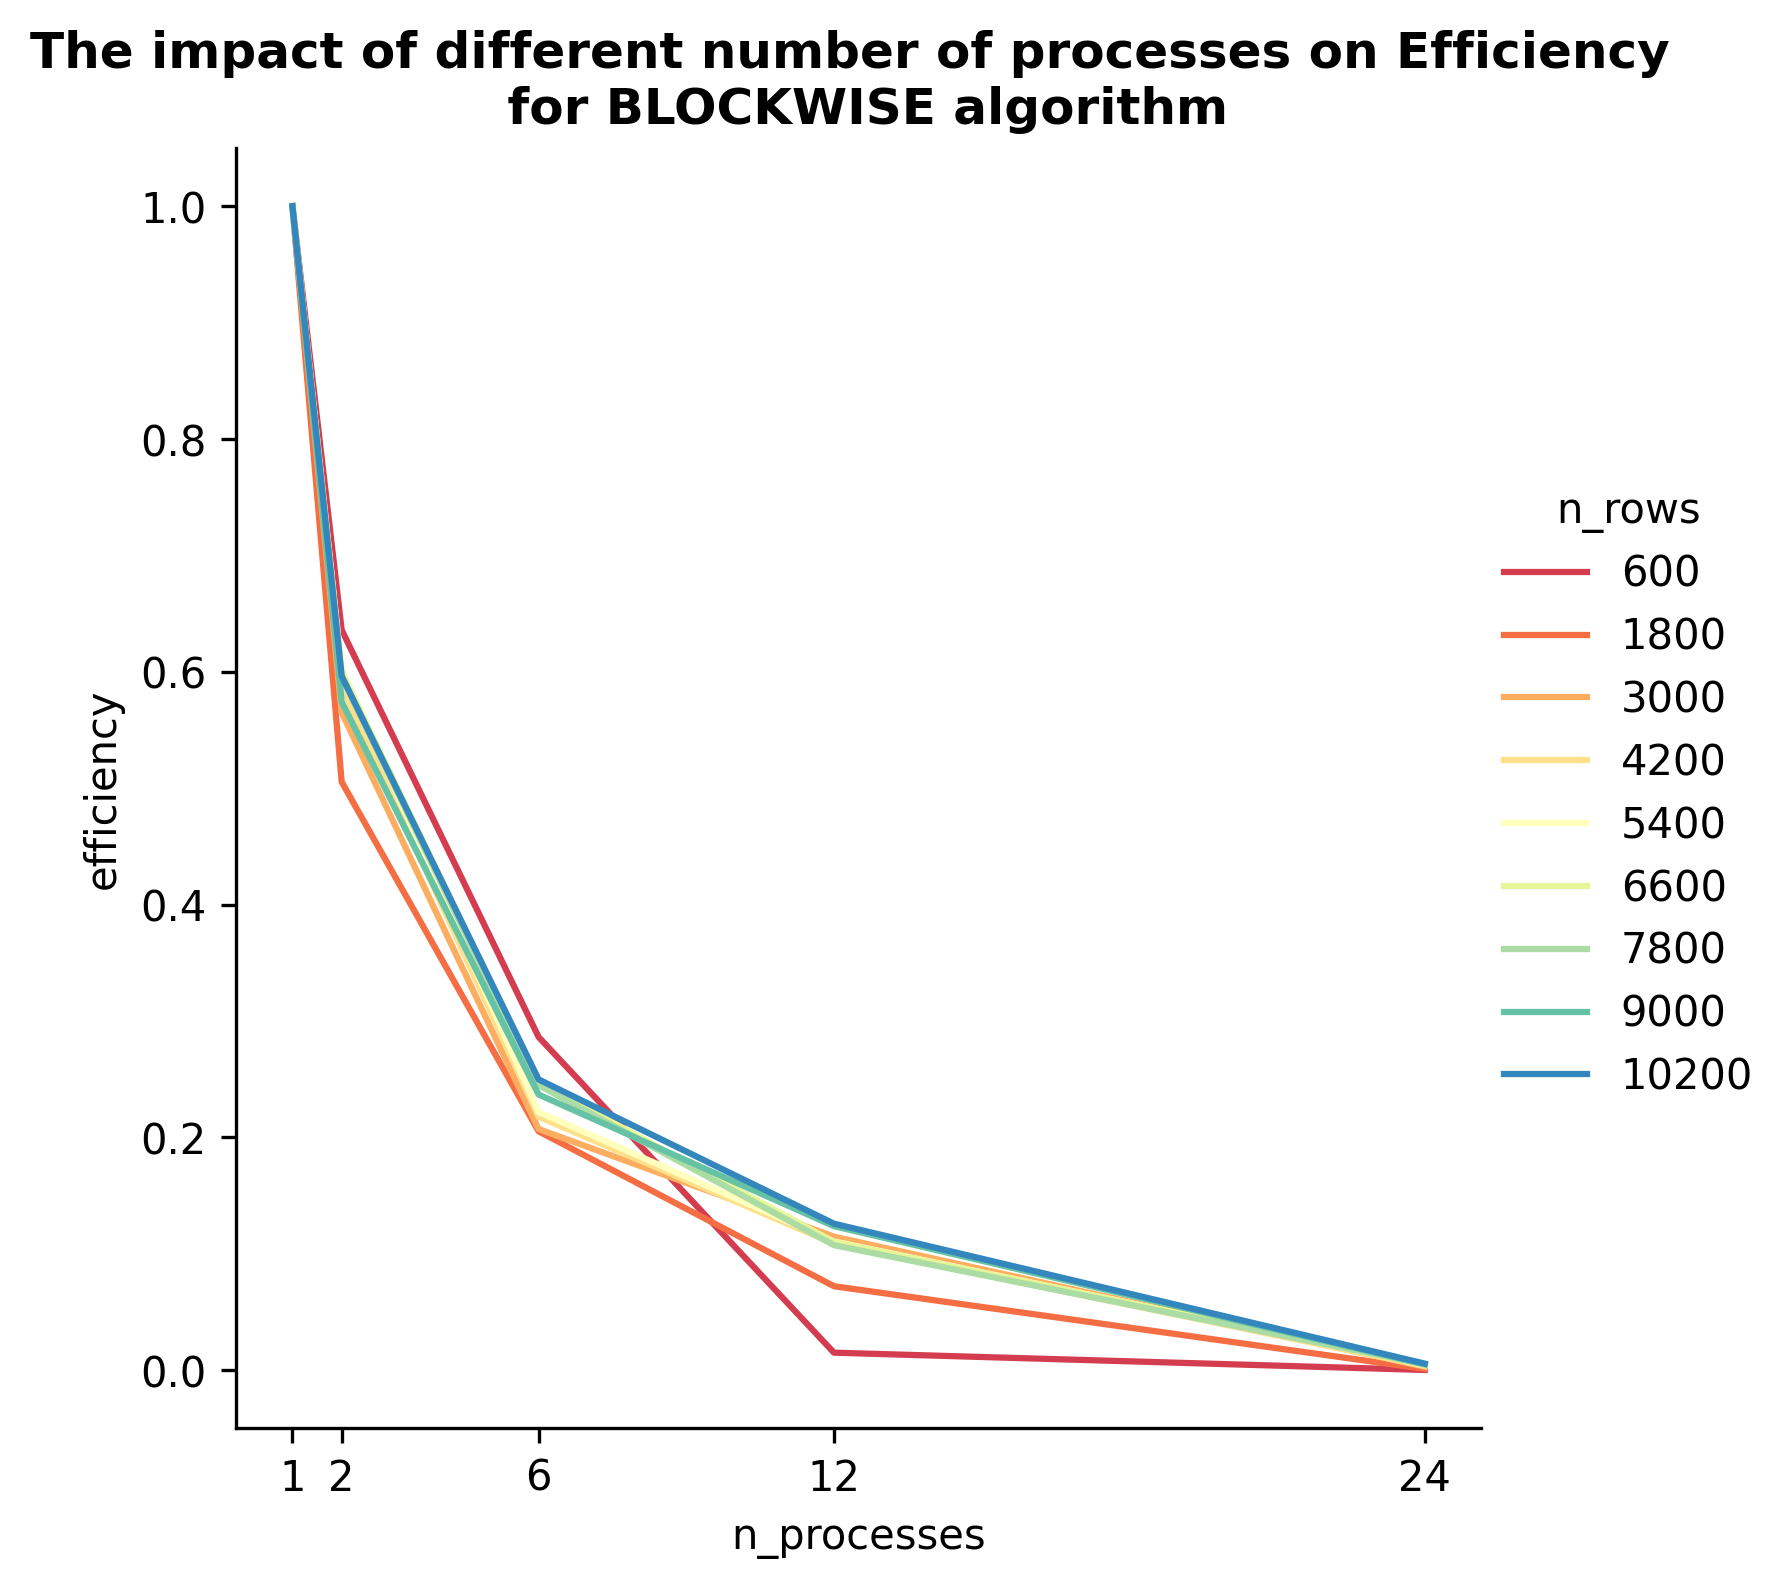

In [14]:
for metr in ['time', 'speed_up', 'efficiency']:
    for i, data in enumerate(datalist):
        g = sns.relplot(
            data,
            x='n_rows',
            y=metr,
            hue='n_processes',
            kind='line',
            palette=sns.color_palette('Blues', n_colors=data['n_processes'].nunique()),
            aspect=1,
            height=5
        )
    
        s = typenames[i]
        
        plt.title(f"The impact of the data of different size on {metr.capitalize()} \n for {s.upper()} algorithm", fontdict={'fontweight': 'bold'})
        plt.xticks(ticks=rowwise['n_rows'].unique(), labels=rowwise['n_rows'].unique())
        plt.show()
    
    
        g = sns.relplot(
            data,
            x='n_processes',
            y=metr,
            hue='n_rows',
            kind='line',
            palette=sns.color_palette('Spectral', n_colors=data['n_rows'].nunique()),
            aspect=1,
            height=5
        )
    
        s = typenames[i]
        
        plt.title(f"The impact of different number of processes on {metr.capitalize()} \n for {s.upper()} algorithm", fontdict={'fontweight': 'bold'})
        plt.xticks(ticks=rowwise['n_processes'].unique(), labels=rowwise['n_processes'].unique())
        plt.show()

---

In [18]:
stat.columns

Index(['n_rows', 'n_cols', 'n_processes', 'time_rowwise', 'speed_up_rowwise',
       'efficiency_rowwise', 'time_colwise', 'speed_up_colwise',
       'efficiency_colwise', 'time_blockwise', 'speed_up_blockwise',
       'efficiency_blockwise'],
      dtype='object')

In [16]:
rowwise.columns = [col + '_rowwise' for col in rowwise.columns]
colwise.columns = [col + '_colwise' for col in colwise.columns]
blockwise.columns = [col + '_blockwise' for col in blockwise.columns]

stat = rowwise.join(colwise).join(blockwise)
stat = stat.drop(columns=['n_processes_blockwise', 'n_cols_blockwise', 'n_rows_blockwise', 'n_processes_colwise', 'n_cols_colwise', 'n_rows_colwise'])
stat.rename(columns={'n_rows_rowwise': 'n_rows', 'n_cols_rowwise': 'n_cols', 'n_processes_rowwise': 'n_processes'}, inplace=True)
stat.head(5)

n_rows  n_cols  n_processes  time_rowwise  speed_up_rowwise  \
0     600     600            1      0.001010               1.0   
1    1800    1800            1      0.009373               1.0   
2    3000    3000            1      0.027865               1.0   
3    4200    4200            1      0.051675               1.0   
4    5400    5400            1      0.085288               1.0   

   efficiency_rowwise  time_colwise  speed_up_colwise  efficiency_colwise  \
0                 1.0      0.002475               1.0                 1.0   
1                 1.0      0.022121               1.0                 1.0   
2                 1.0      0.065752               1.0                 1.0   
3                 1.0      0.139383               1.0                 1.0   
4                 1.0      0.233374               1.0                 1.0   

   time_blockwise  speed_up_blockwise  efficiency_blockwise  
0        0.001020                 1.0                   1.0  
1        0.009474                 1.0                   1.0  
2        0.026977                 1.0                   1.0  
3        0.051229                 1.0                   1.0  
4        0.085472                 1.0                   1.0

In [19]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))

for i, n_proc in enumerate(stat['n_processes'].unique()):
    for j, metr in enumerate(['time', 'speed_up', 'efficiency']):
        cur_stat = stat.query('n_processes == @n_proc')
        
        axes[i][j].plot(cur_stat['n_rows'], cur_stat[f'{metr}_rowwise'], label='rowwise')
        axes[i][j].plot(cur_stat['n_rows'], cur_stat[f'{metr}_colwise'], label='colwise')
        axes[i][j].plot(cur_stat['n_rows'], cur_stat[f'{metr}_blockwise'], label='blockwise')

        axes[i][j].set_title(f'Dependence of {metr.capitalize()} \n on the number of `n_rows` being executed on {n_proc} processes', fontdict={'fontweight': 'bold'})
        
        axes[i][j].legend()
        
        axes[i][j].set_xticks(ticks=stat['n_rows'].unique(), labels=stat['n_rows'].unique())
        axes[i][j].set_xlabel('n_rows', fontdict={'fontweight': 'bold'})
        axes[i][j].set_ylabel(metr, fontdict={'fontweight': 'bold'})


plt.tight_layout()